Data source:https://www.kaggle.com/datasets/purumalgi/music-genre-classification
https://machinehack.com/hackathons/music_genre_classification_weekend_hackathon_edition_2_the_last_hacker_standing/overview

The description of variables(columns)

Artist Name: The name of the artist who performed or created the track. This is a categorical text variable, useful for identifying tracks by specific artists.

Track Name: The title of the music track. Like 'Artist Name', this is a categorical text variable and can be used to identify specific songs or styles within an artist's work.

Popularity: A numerical score typically ranging from 0 to 100 that reflects the current popularity of the track. Higher values indicate greater popularity.

Danceability: A measure from 0.0 to 1.0 indicating how suitable a track is for dancing based on tempo, rhythm stability, beat strength, and overall regularity. Higher values suggest the track is more danceable.

Energy: A measure from 0.0 to 1.0 that represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

Key: The key the track is in, encoded as integers where C=0, C#=1, D=2, etc., up to B=11. It can reflect the tonal center of the music.

Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for understanding the relative loudness of tracks in a dataset.

Mode: Indicates the modality (major or minor) of a track, derived from the scale used. Mode is binary (0 = minor, 1 = major), and major is generally associated with a happier and brighter sound.

Speechiness: Measures the presence of spoken words in a track. A higher value indicates that the track contains more spoken word content (e.g., talk shows, audio books, poetry).

Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic. Higher values represent a higher likelihood the track is acoustic.

Instrumentalness: Predicts whether a track contains no vocals. Values closer to 1.0 indicate the track contains no vocal content (instrumental), which might be important for certain applications like background music.

Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric).

Tempo: The overall estimated tempo of a track in beats per minute (BPM). Tempo is a useful feature for genre classification as certain genres often fall into specific tempo ranges.

Duration in min/ms: The length of the track either in minutes or milliseconds, a numeric variable that can influence the structure and style of a track.

Time Signature: A notational convention to specify how many beats are in each bar (or measure). Common time signatures include 4 (common time), which is very typical in most forms of music.

Class: This is the target variable for classification tasks. It likely represents a numeric encoding of different music genres or classes.

Class label meanings:

Acoustic/Folk:0

Alt_Music:1

Blues: 2

Bollywood:3

Country:4

HipHop:5

Indie Alt:6

Instrumental: 7

Metal:8

Pop:9

Rock:10


Part 1. Exploratory Data Analysis (EDA)

In [21]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
df = pd.read_csv("music.csv")
print(df.dtypes)

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object


In [22]:
print(df.head(10))
print(f"We have {df.shape[0]} rows and {df.shape[1]} columns.") #number of rows and columns

                 Artist Name                             Track Name  \
0                 Bruno Mars  That's What I Like (feat. Gucci Mane)   
1                     Boston                           Hitch a Ride   
2              The Raincoats                     No Side to Fall In   
3                       Deno             Lingo (feat. J.I & Chunkz)   
4      Red Hot Chili Peppers      Nobody Weird Like Me - Remastered   
5                The Stooges      Search and Destroy - Iggy Pop Mix   
6              Solomon Burke                    None Of Us Are Free   
7               Randy Travis                      On the Other Hand   
8  Professional Murder Music                                   Slow   
9                Dudu Aharon        ◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î   

   Popularity  danceability  energy   key  loudness  mode  speechiness  \
0        60.0         0.854   0.564   1.0    -4.964     1       0.0485   
1        54.0         0.382   0.814   3.0    -7.230     1       0.0406

For reference: in many audio contexts, loudness values can be negative because they are typically measured relative to a reference level (often 0 dB), which is the threshold of hearing. Therefore, many musical tracks may have loudness values between -60 dB and 0 dB, where 0 dB is the loudest sound before distortion occurs. We don't need to change the negative values to positive. 

In [23]:
 #we also need to unify the unit of the duration
df["duration_in min/ms"] = np.where(df["duration_in min/ms"] < 100, df["duration_in min/ms"] * 60000, df["duration_in min/ms"])
df.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace=True)
print(df.head(10))

                 Artist Name                             Track Name  \
0                 Bruno Mars  That's What I Like (feat. Gucci Mane)   
1                     Boston                           Hitch a Ride   
2              The Raincoats                     No Side to Fall In   
3                       Deno             Lingo (feat. J.I & Chunkz)   
4      Red Hot Chili Peppers      Nobody Weird Like Me - Remastered   
5                The Stooges      Search and Destroy - Iggy Pop Mix   
6              Solomon Burke                    None Of Us Are Free   
7               Randy Travis                      On the Other Hand   
8  Professional Murder Music                                   Slow   
9                Dudu Aharon        ◊ì◊ï◊ì◊ï, ◊ô◊ê◊ú◊ú◊î ◊ô◊ê◊ú◊ú◊î   

   Popularity  danceability  energy   key  loudness  mode  speechiness  \
0        60.0         0.854   0.564   1.0    -4.964     1       0.0485   
1        54.0         0.382   0.814   3.0    -7.230     1       0.0406

In [24]:
inds = df.columns
for i in inds:
    print(df[i].describe())

count               17996
unique               9149
top       Backstreet Boys
freq                   69
Name: Artist Name, dtype: object
count      17996
unique     15129
top       Dreams
freq           9
Name: Track Name, dtype: object
count    17568.000000
mean        44.512124
std         17.426928
min          1.000000
25%         33.000000
50%         44.000000
75%         56.000000
max        100.000000
Name: Popularity, dtype: float64
count    17996.000000
mean         0.543433
std          0.166268
min          0.059600
25%          0.432000
50%          0.545000
75%          0.659000
max          0.989000
Name: danceability, dtype: float64
count    17996.000000
mean         0.662777
std          0.235373
min          0.000020
25%          0.509000
50%          0.700000
75%          0.860000
max          1.000000
Name: energy, dtype: float64
count    15982.000000
mean         5.952447
std          3.196854
min          1.000000
25%          3.000000
50%          6.000000
75%   

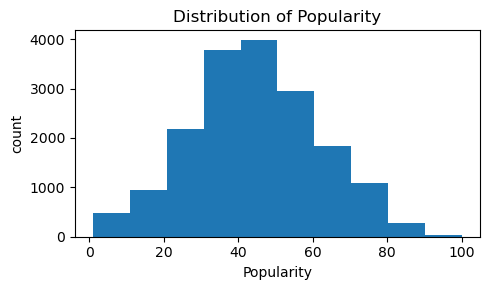

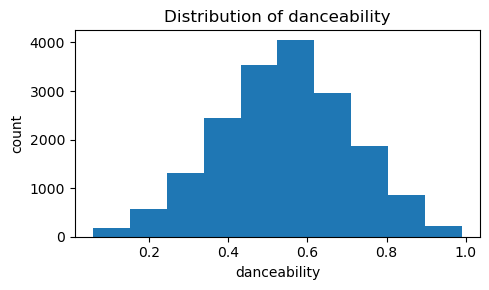

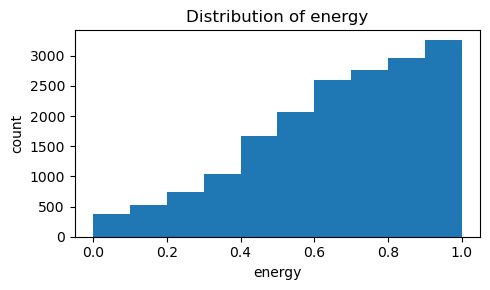

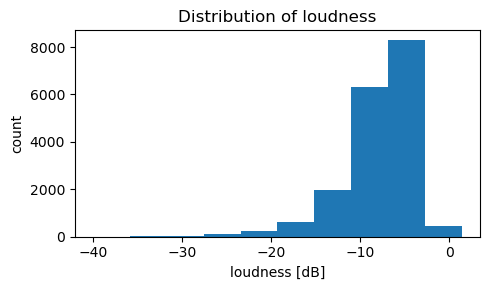

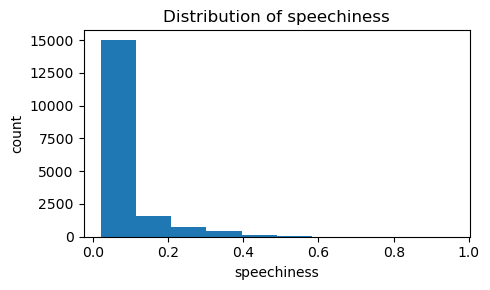

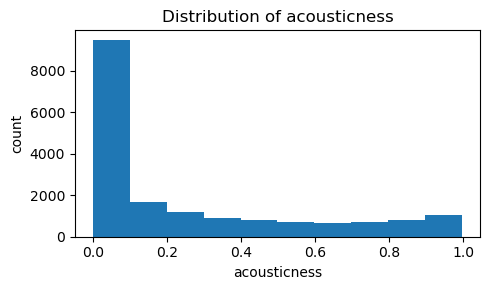

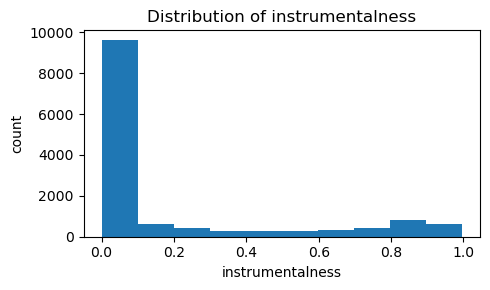

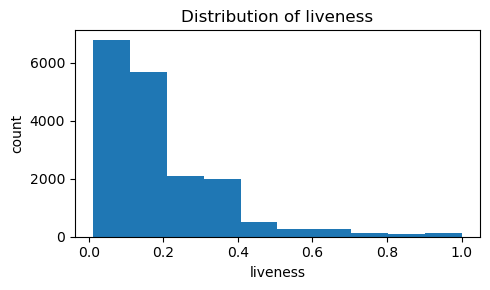

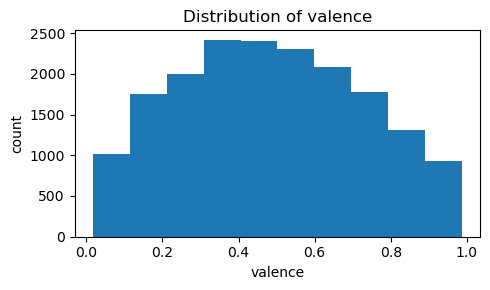

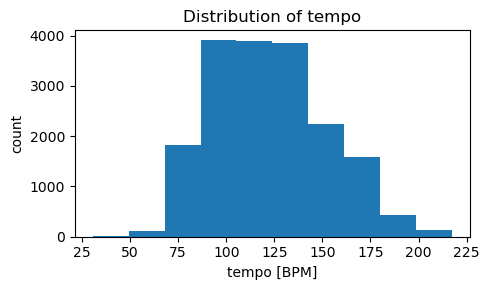

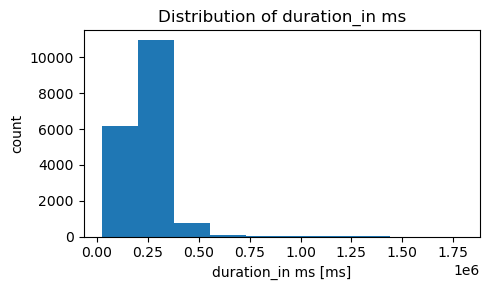

In [25]:
#plotting histograms for continuous variables/features
for i in ["Popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_in ms"]:
    plt.figure(figsize = (5,3))
    df[i].plot.hist()
    if i == "tempo":
        plt.xlabel(f"{i} [BPM]")
    elif i == "duration_in ms":
        plt.xlabel(f"{i} [ms]")
    elif i == "loudness":
        plt.xlabel(f"{i} [dB]")
    else: 
        plt.xlabel(f"{i}")
    plt.ylabel("count")
    plt.title(f"Distribution of {i}")
    plt.tight_layout()
    plt.show()

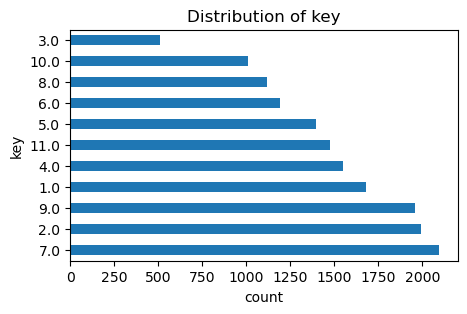

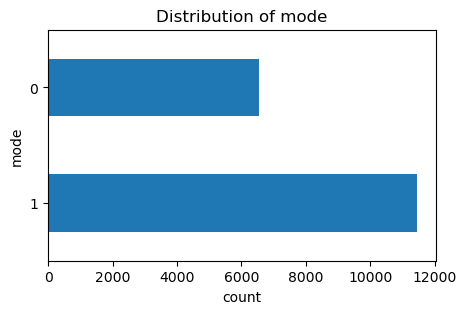

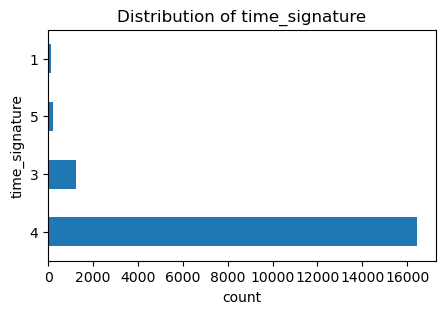

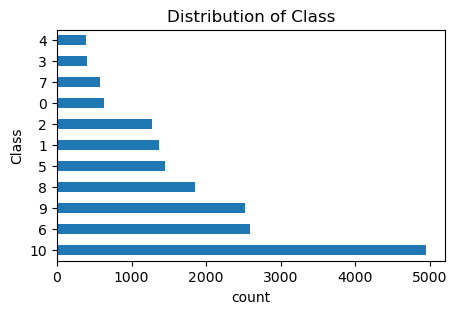

In [26]:
#plotting bar plots for categorical variables/features and the target variable class
for i in ["key","mode","time_signature","Class"]:
    plt.figure(figsize = (5,3))
    df[i].value_counts().plot.barh()
    plt.xlabel("count")
    plt.ylabel(f"{i}")
    plt.title(f"Distribution of {i}")
    plt.show

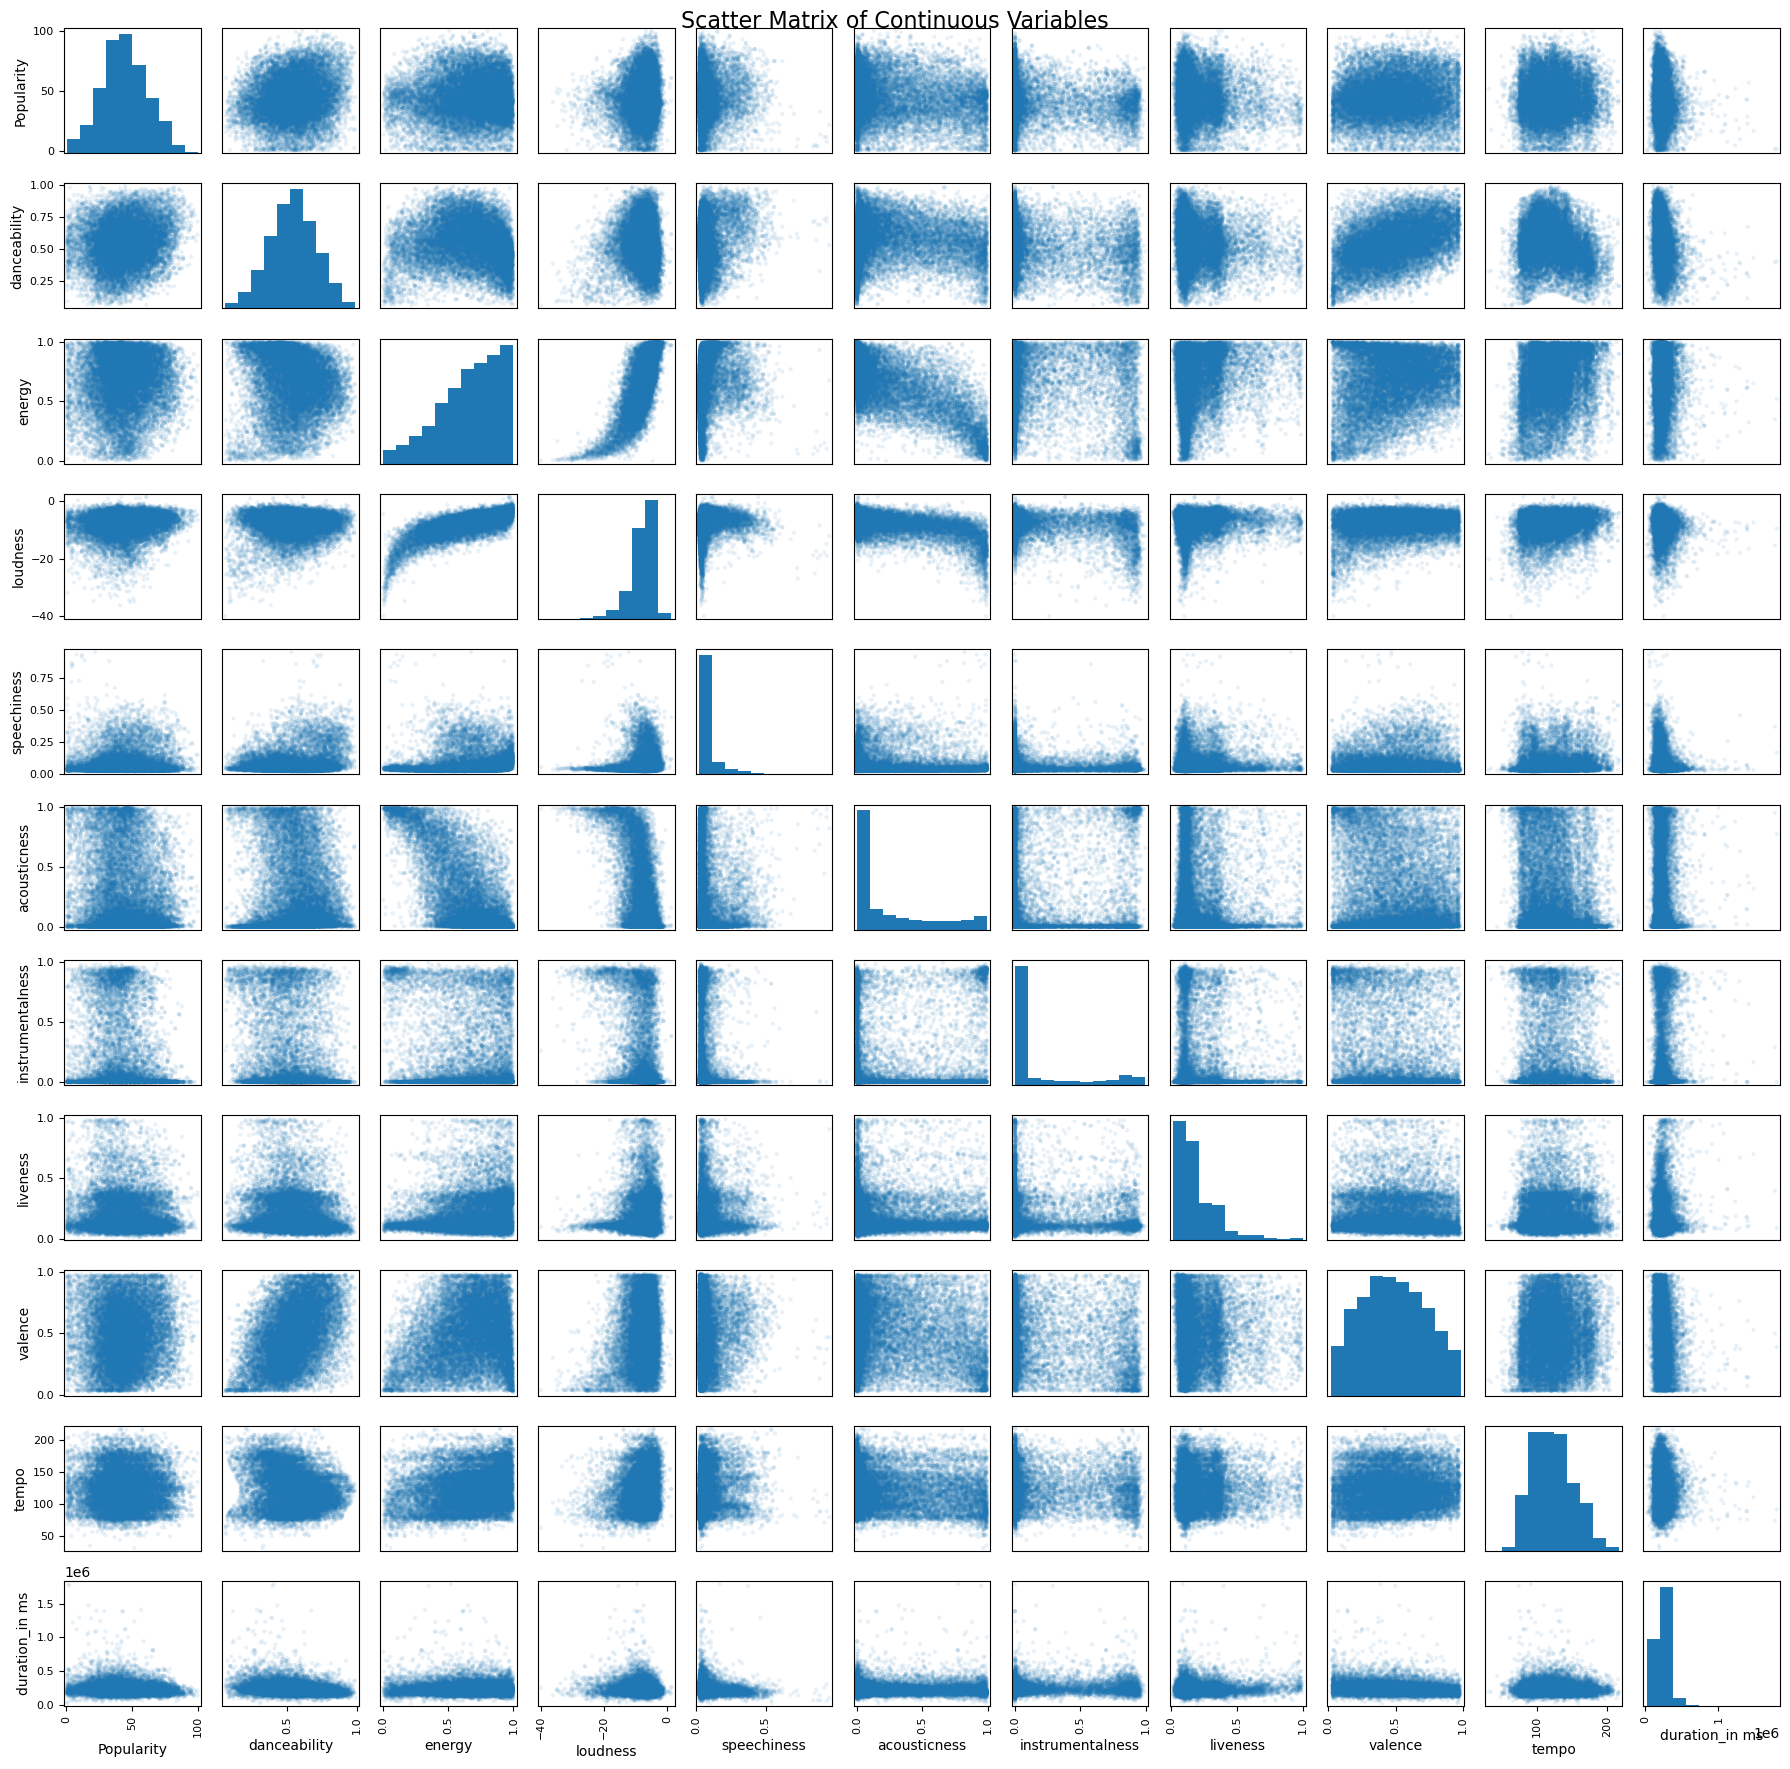

In [27]:
#more EDAs on relationships between features
#continuous vs continuous
from pandas.plotting import scatter_matrix
vars_cont = ["Popularity", "danceability", "energy", "loudness", "speechiness", 
             "acousticness", "instrumentalness", "liveness", "valence", 
             "tempo", "duration_in ms"]
scatter_matrix(df[vars_cont], figsize=(18, 18), alpha=0.1)
plt.suptitle('Scatter Matrix of Continuous Variables', fontsize=16)
plt.tight_layout()
plt.show()

(I also wrote codes for the individual scatterplots:)
import itertools

vars_cont = ["Popularity", "danceability", "energy", "loudness", "speechiness", 
             "acousticness", "instrumentalness", "liveness", "valence", 
             "tempo", "duration_in min/ms"]

pairs = itertools.combinations(vars_cont, 2)

for (i, k) in pairs:

    df.plot.scatter(i, k, figsize=(5, 3), alpha=0.1)

    plt.title(f"{k} vs {i}")

    plt.show()

It seems like there's a positive correlation between valence and danceability，loudness and energy, and a negative correlation between acousticness and energy. 
I will dive deeper later using correlation matrix as well as f_classif when Class is involved.

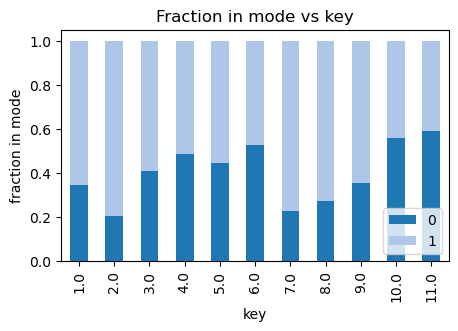

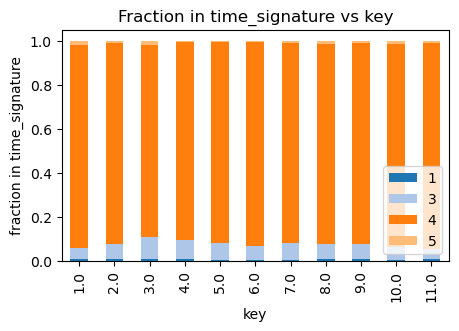

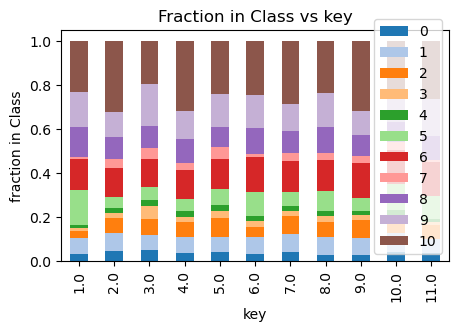

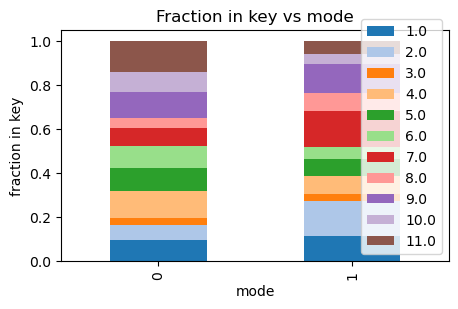

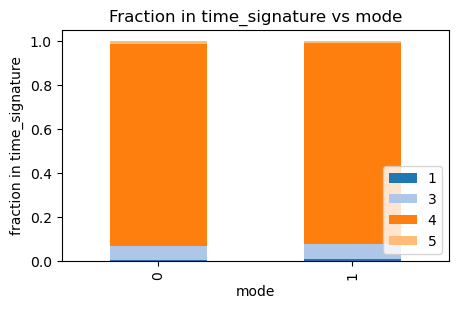

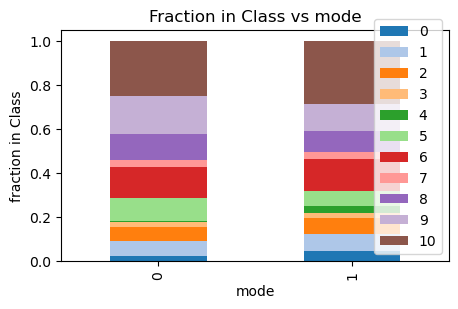

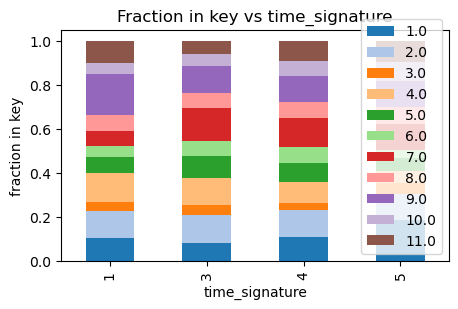

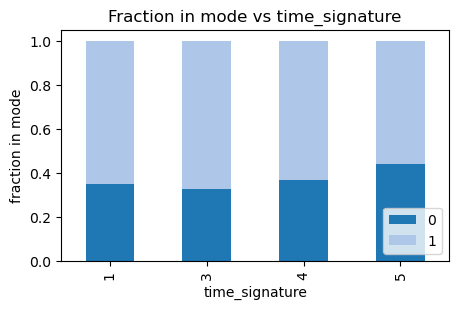

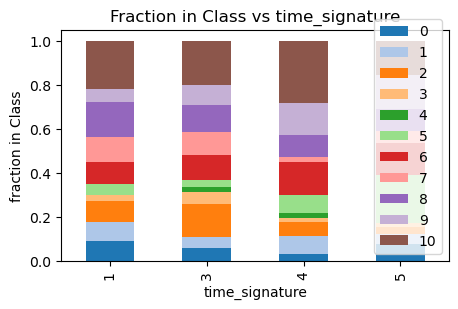

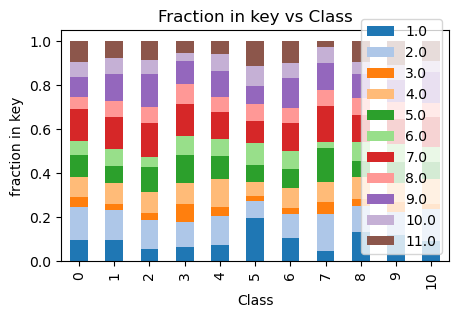

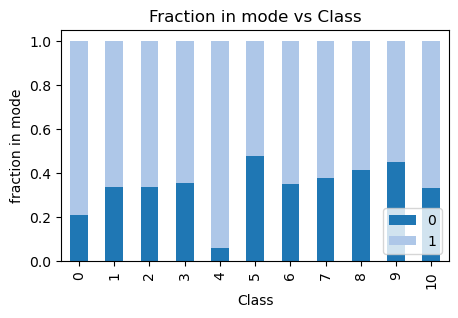

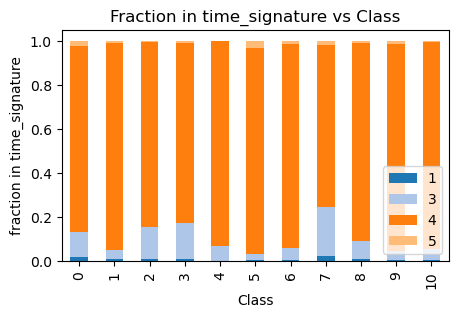

In [28]:
#categorical vs categorical 
vars_cat = ["key","mode","time_signature","Class"]
num_colors = max(len(df[col].unique()) for col in vars_cat)
colors = plt.cm.tab20(range(num_colors))
for i in ["key","mode","time_signature","Class"]:   
    for k in ["key","mode","time_signature","Class"]:
        if i != k:
            count_matrix = df.groupby([i, k]).size().unstack()
            count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
            count_matrix_norm.plot(kind='bar', stacked=True, figsize=(5, 3), color=colors)
            plt.ylabel(f"fraction in {k}")
            plt.title(f"Fraction in {k} vs {i}")
            plt.legend(loc=4)
            plt.show()

From fraction in mode vs class graph, we could find that the songs in country music(4) is disproportionally(more than 90%) written in mode1, which refers to a major key. Similarly, acoustic/folk music songs are around 80% written in a major key.

<Figure size 800x500 with 0 Axes>

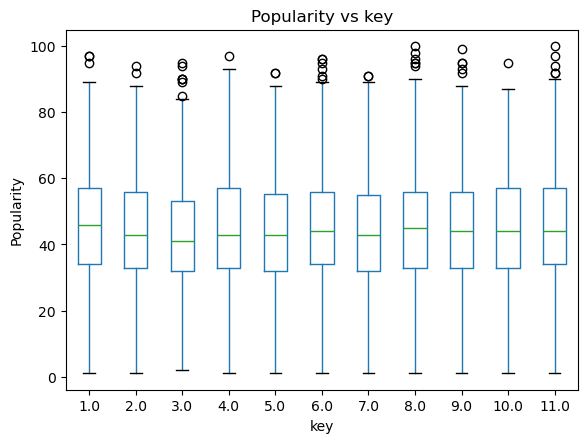

<Figure size 800x500 with 0 Axes>

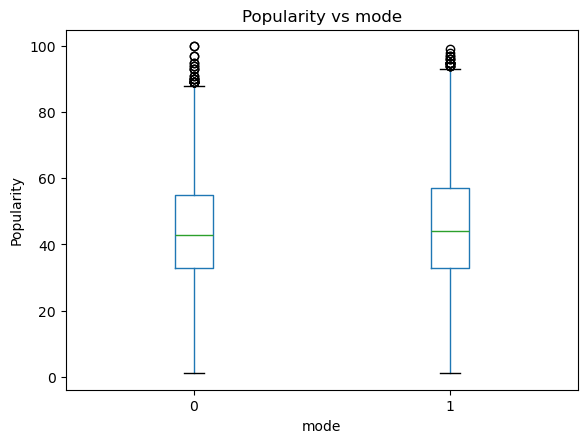

<Figure size 800x500 with 0 Axes>

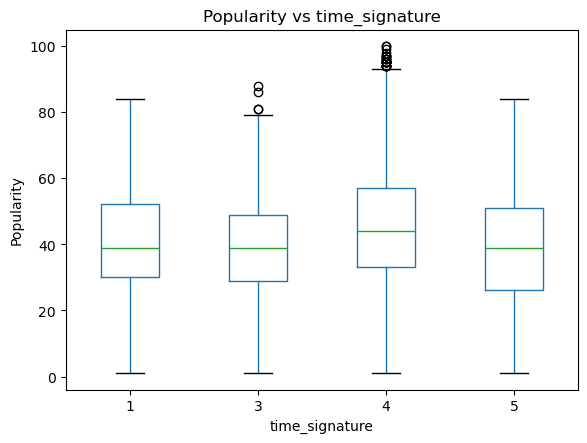

<Figure size 800x500 with 0 Axes>

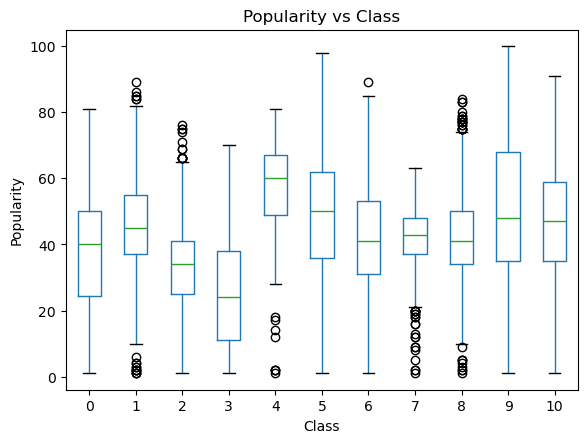

<Figure size 800x500 with 0 Axes>

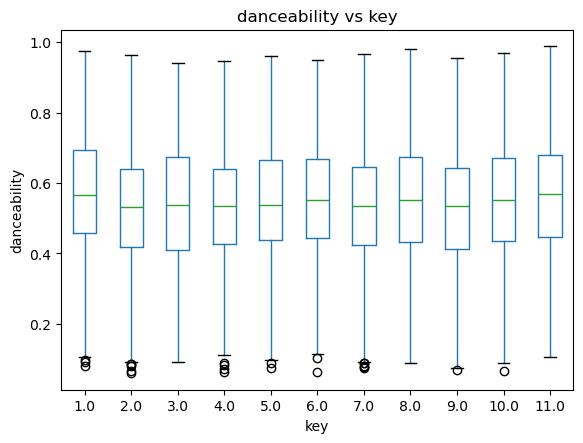

<Figure size 800x500 with 0 Axes>

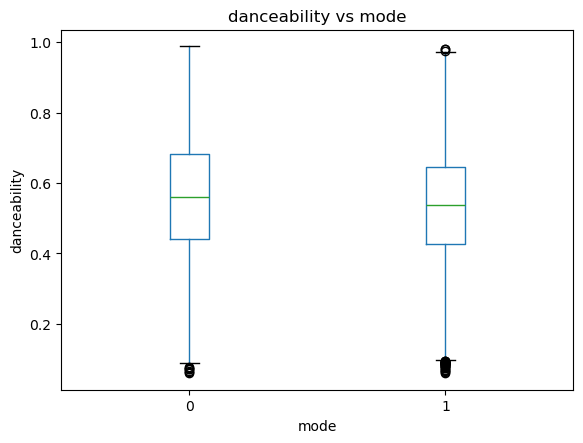

<Figure size 800x500 with 0 Axes>

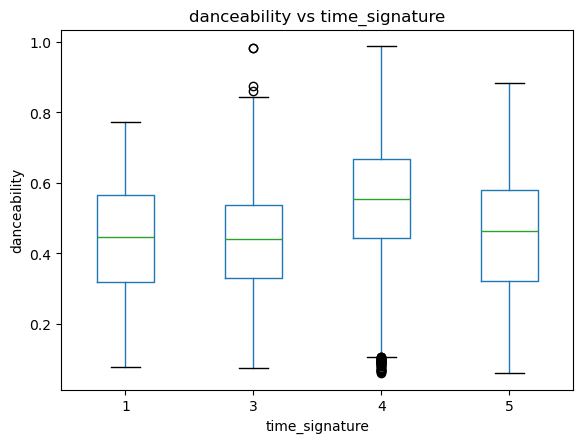

<Figure size 800x500 with 0 Axes>

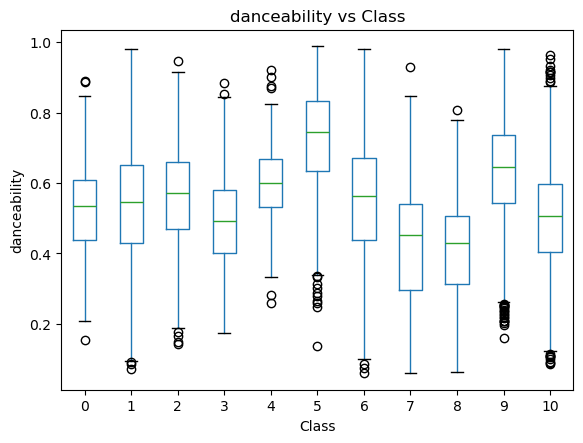

<Figure size 800x500 with 0 Axes>

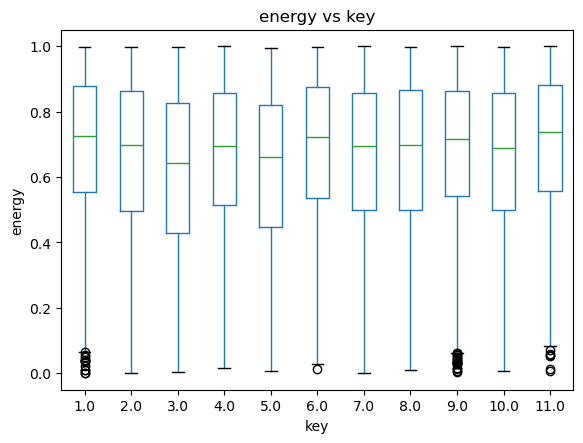

<Figure size 800x500 with 0 Axes>

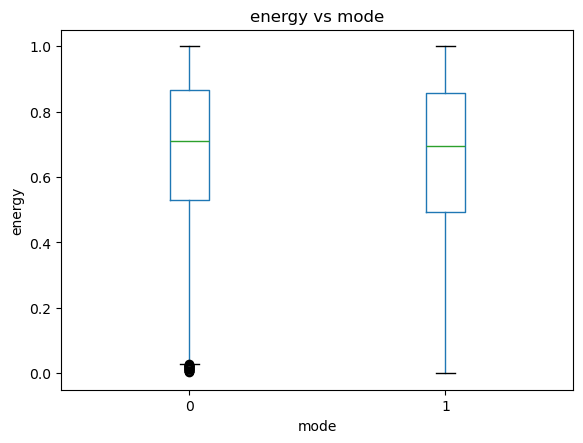

<Figure size 800x500 with 0 Axes>

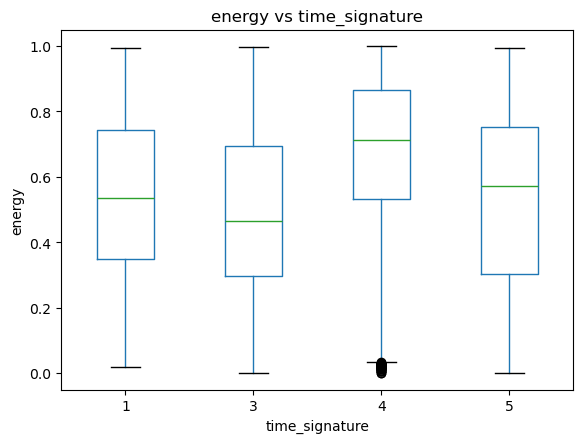

<Figure size 800x500 with 0 Axes>

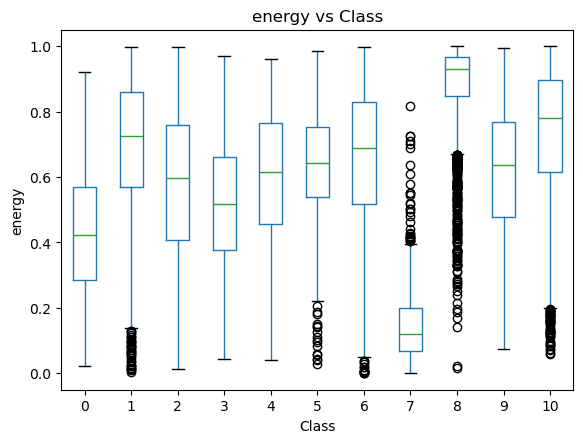

<Figure size 800x500 with 0 Axes>

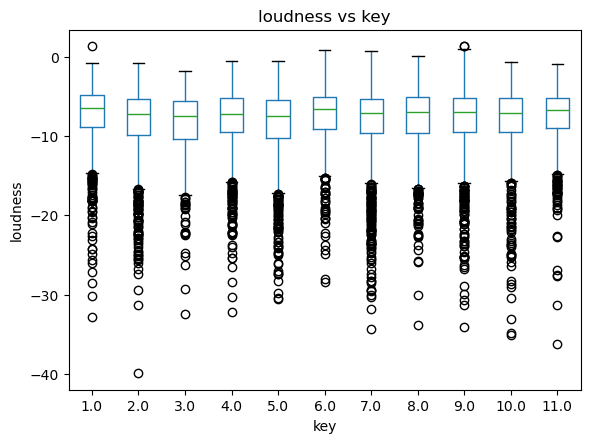

<Figure size 800x500 with 0 Axes>

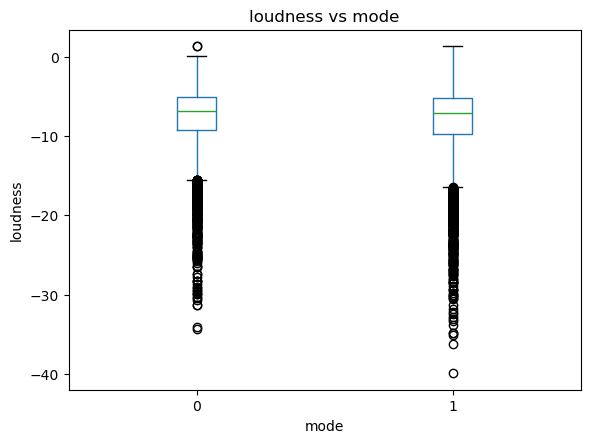

<Figure size 800x500 with 0 Axes>

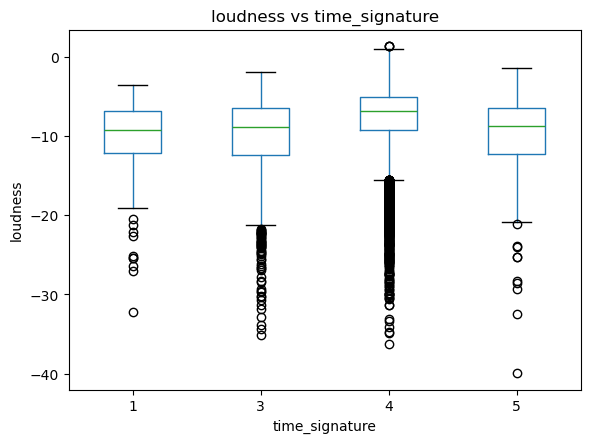

<Figure size 800x500 with 0 Axes>

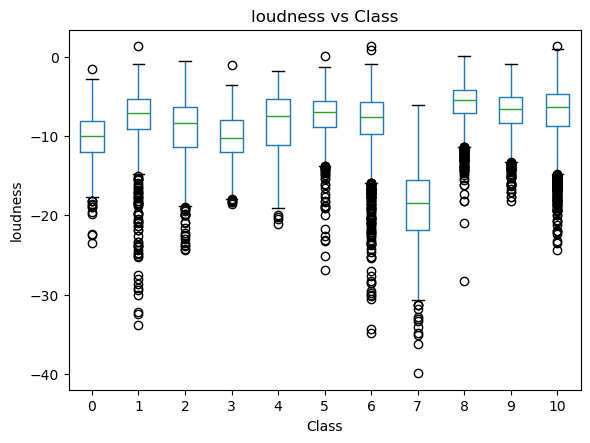

<Figure size 800x500 with 0 Axes>

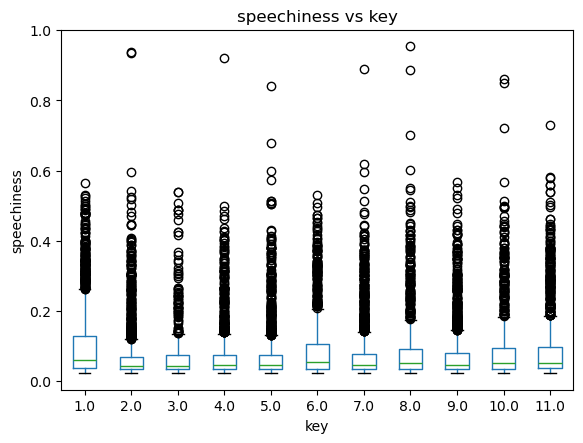

<Figure size 800x500 with 0 Axes>

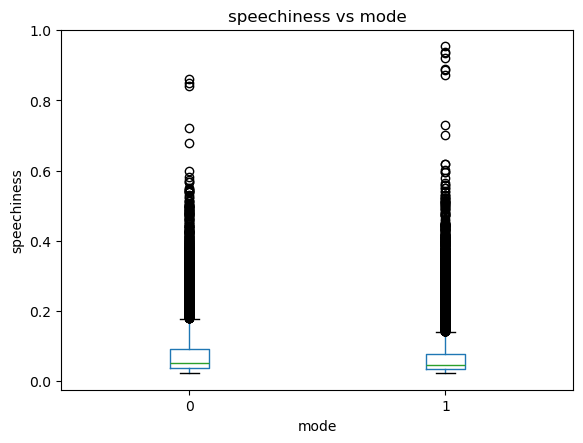

<Figure size 800x500 with 0 Axes>

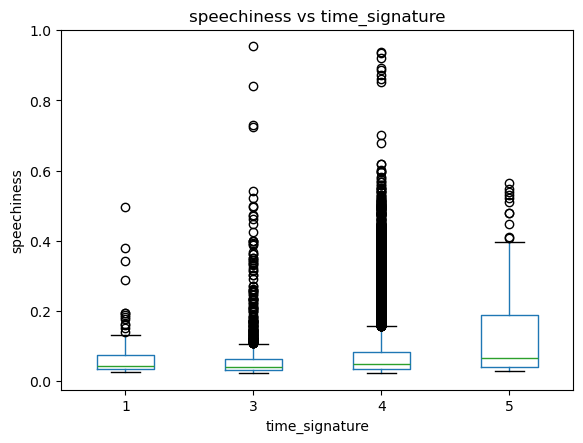

<Figure size 800x500 with 0 Axes>

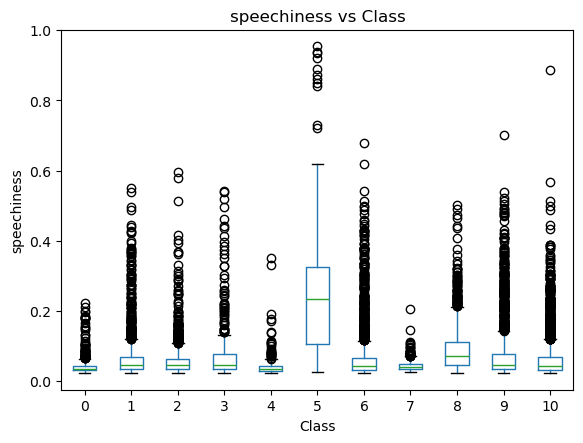

<Figure size 800x500 with 0 Axes>

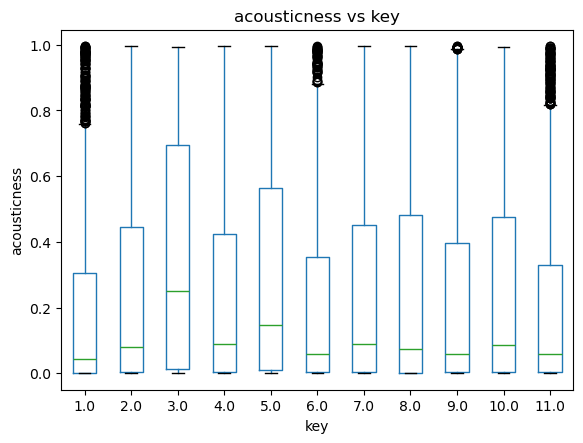

<Figure size 800x500 with 0 Axes>

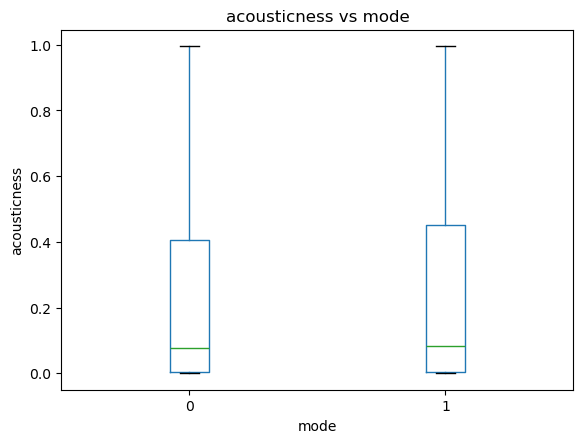

<Figure size 800x500 with 0 Axes>

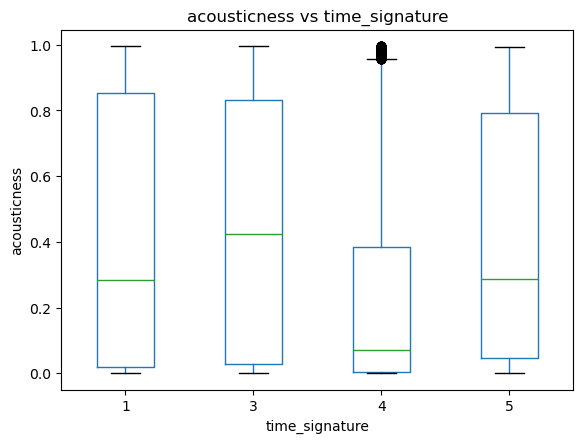

<Figure size 800x500 with 0 Axes>

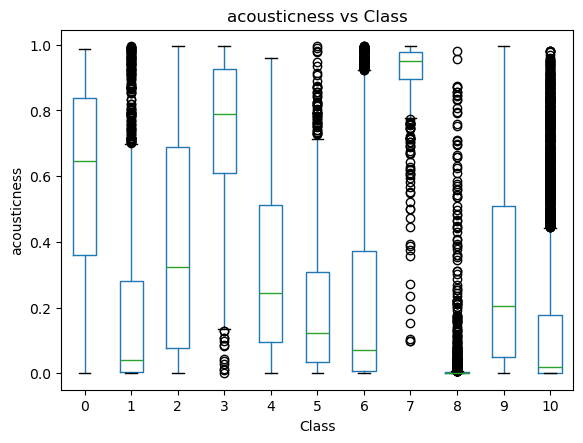

<Figure size 800x500 with 0 Axes>

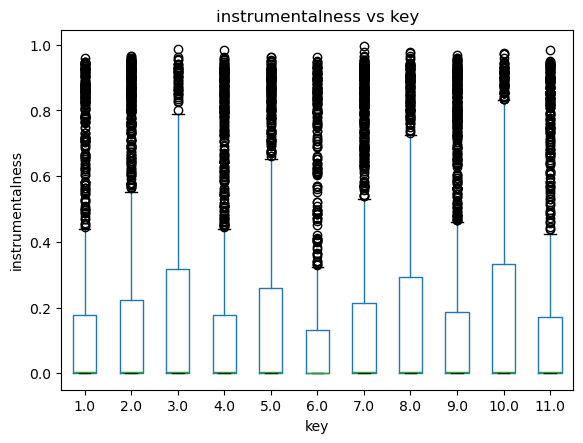

<Figure size 800x500 with 0 Axes>

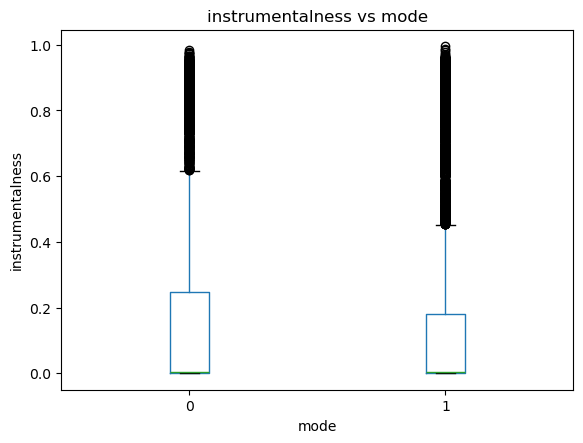

<Figure size 800x500 with 0 Axes>

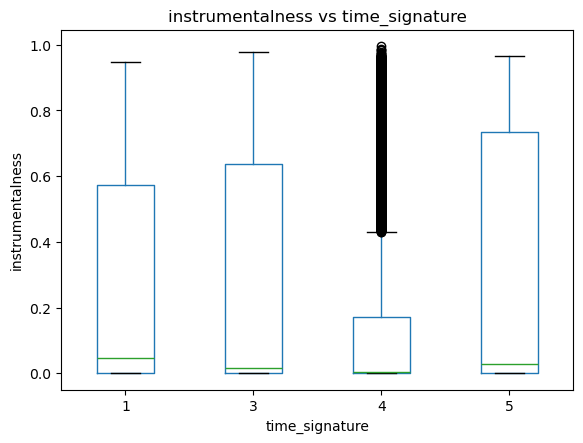

<Figure size 800x500 with 0 Axes>

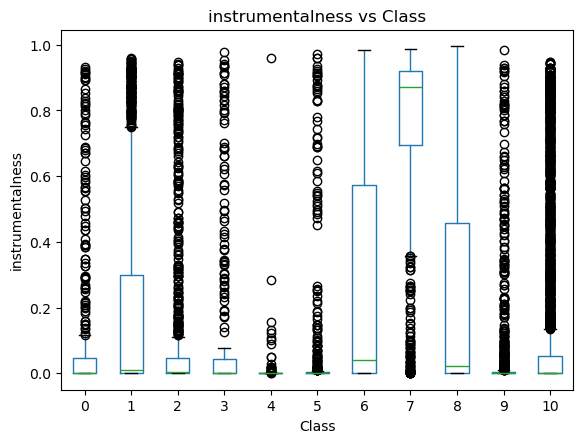

<Figure size 800x500 with 0 Axes>

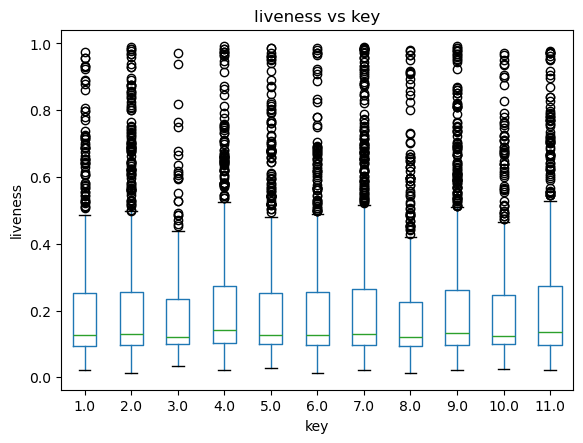

<Figure size 800x500 with 0 Axes>

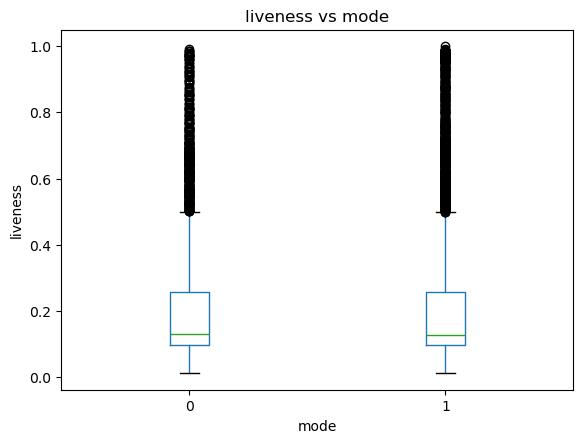

<Figure size 800x500 with 0 Axes>

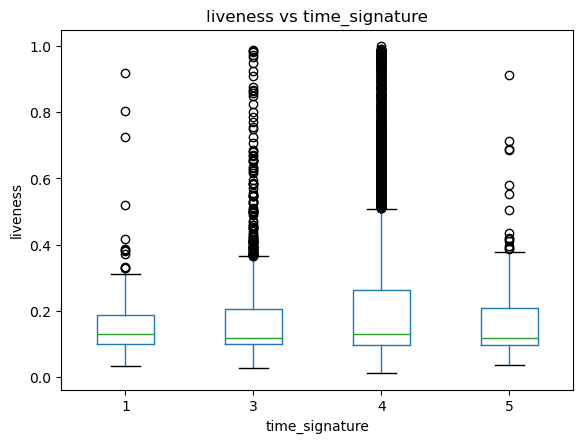

<Figure size 800x500 with 0 Axes>

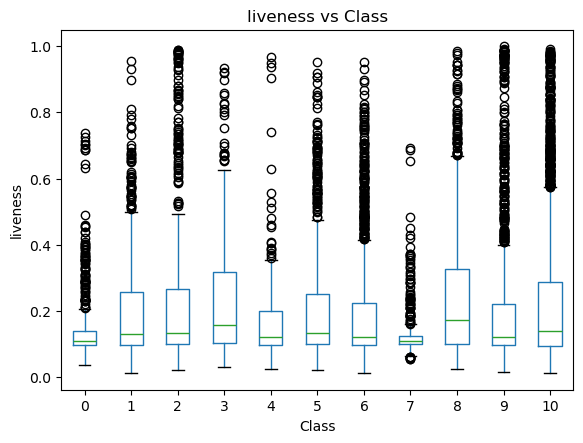

<Figure size 800x500 with 0 Axes>

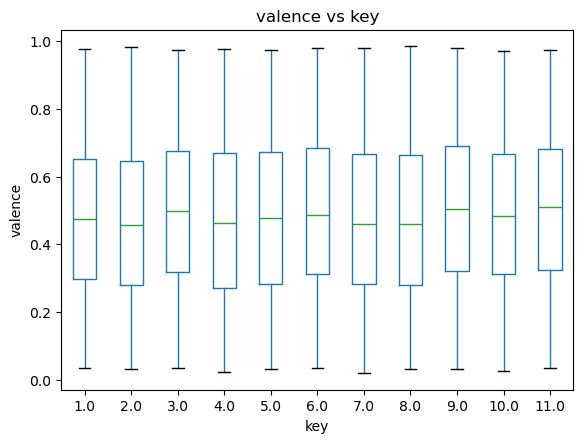

<Figure size 800x500 with 0 Axes>

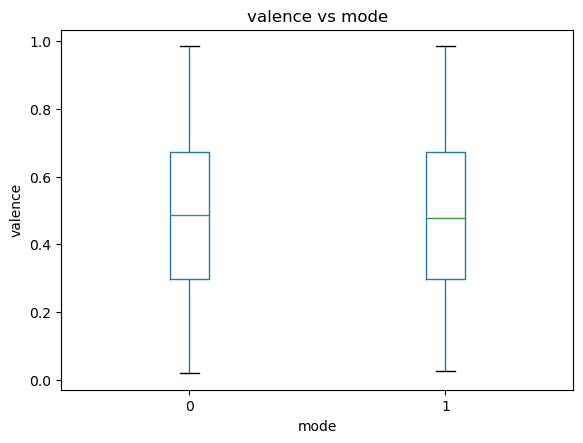

<Figure size 800x500 with 0 Axes>

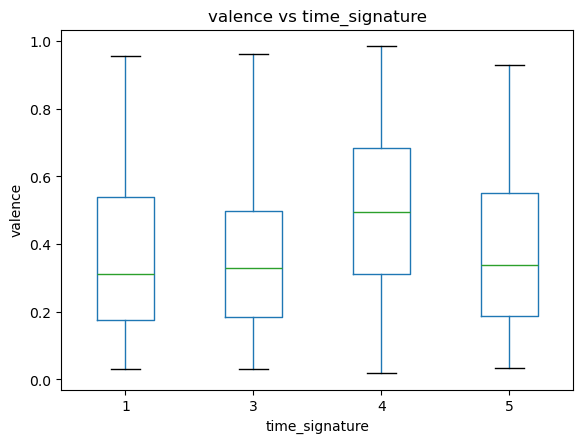

<Figure size 800x500 with 0 Axes>

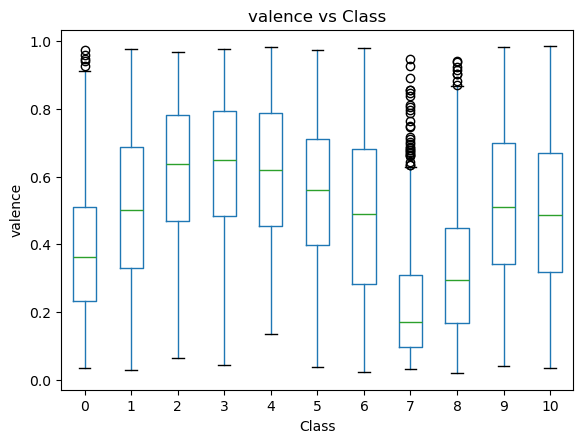

<Figure size 800x500 with 0 Axes>

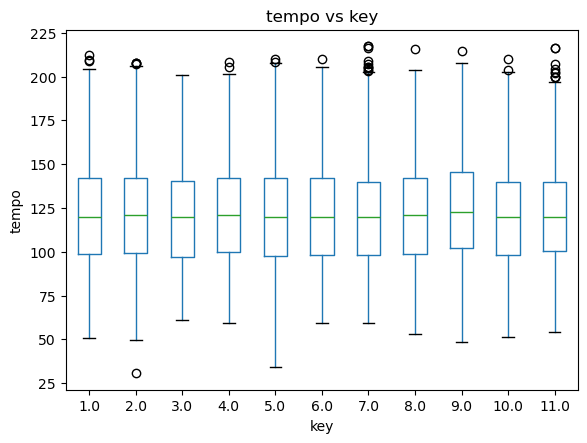

<Figure size 800x500 with 0 Axes>

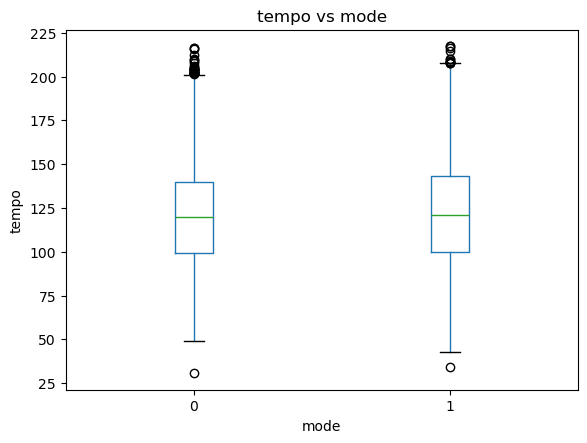

<Figure size 800x500 with 0 Axes>

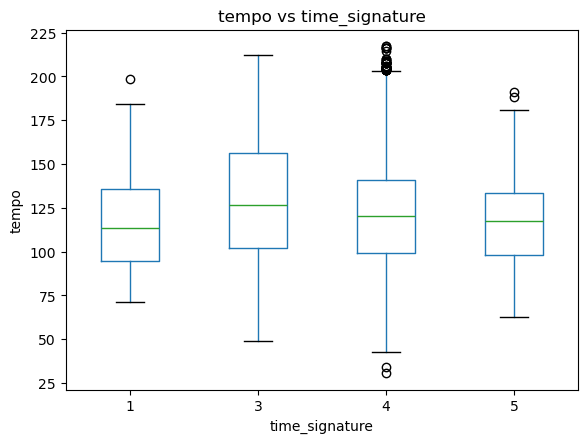

<Figure size 800x500 with 0 Axes>

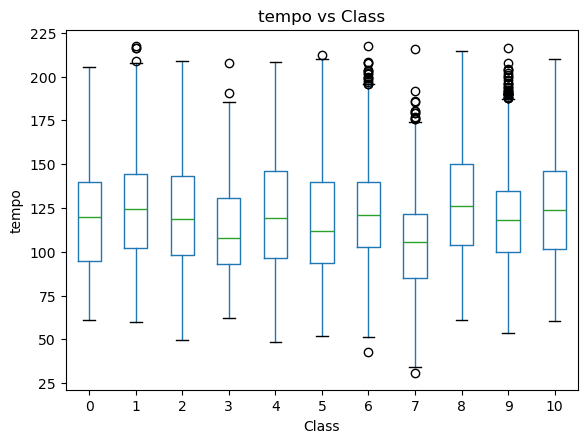

<Figure size 800x500 with 0 Axes>

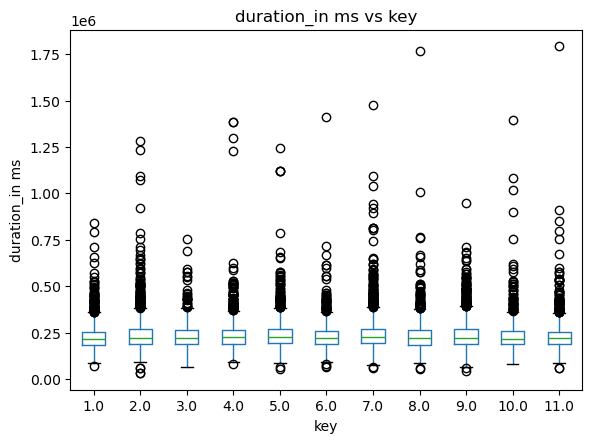

<Figure size 800x500 with 0 Axes>

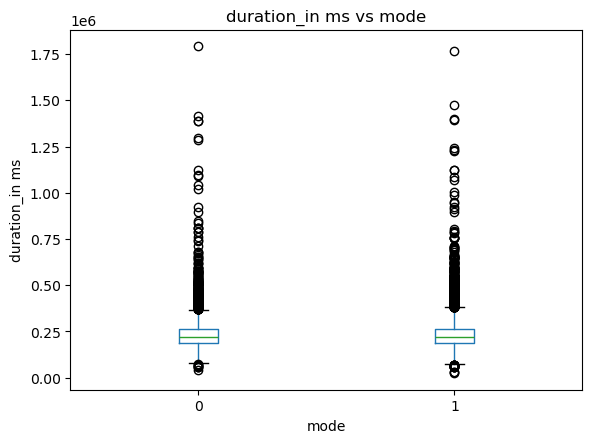

<Figure size 800x500 with 0 Axes>

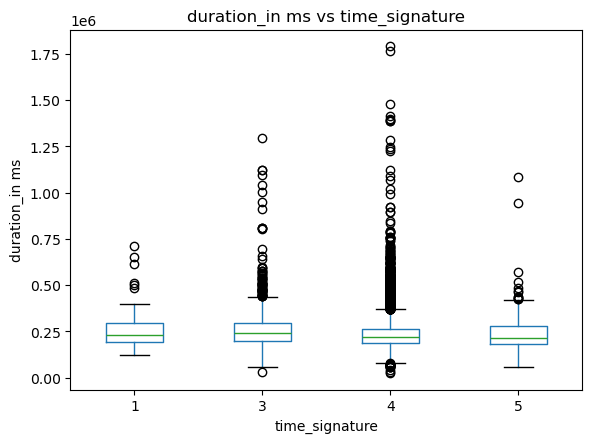

<Figure size 800x500 with 0 Axes>

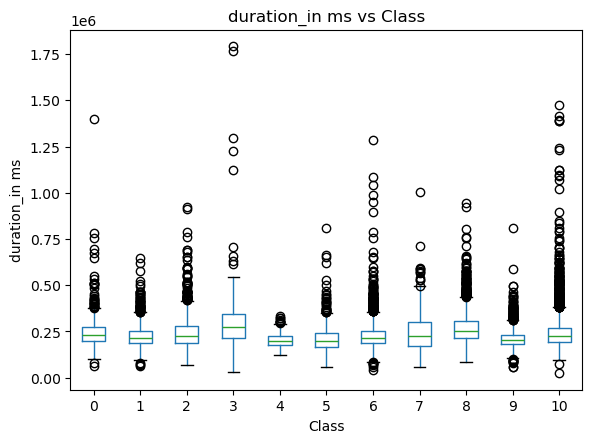

In [29]:
#continuous vs categorical
#box plots
for var_cont in vars_cont:
    for var_cat in vars_cat:
        plt.figure(figsize=(8, 5))
        df.boxplot(column=var_cont, by=var_cat, grid=False)
        plt.title(f"{var_cont} vs {var_cat}")
        plt.suptitle("") 
        plt.ylabel(var_cont)
        plt.xlabel(var_cat)
        plt.show()

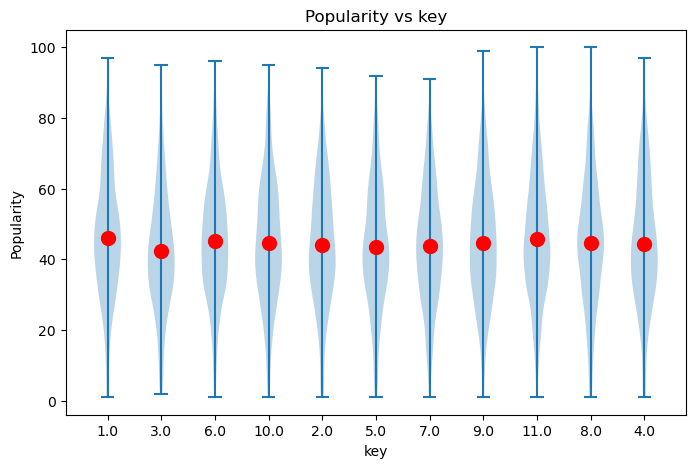

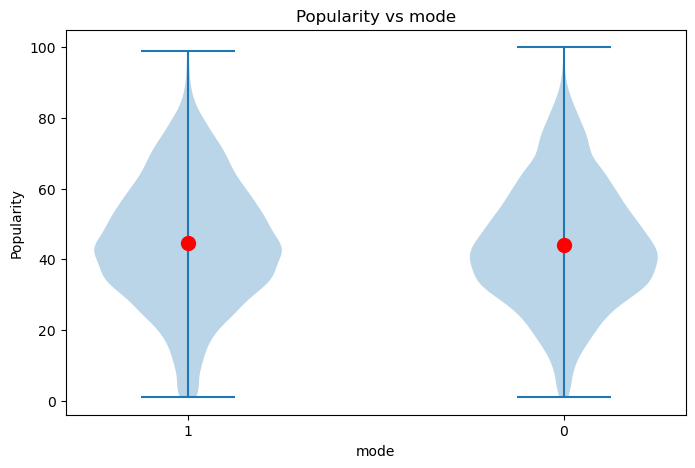

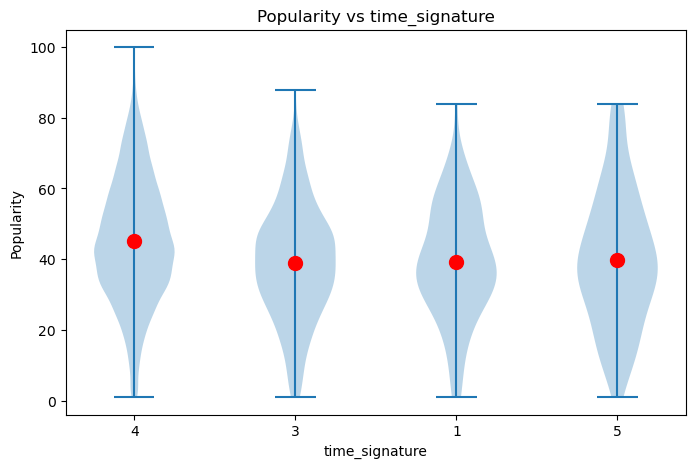

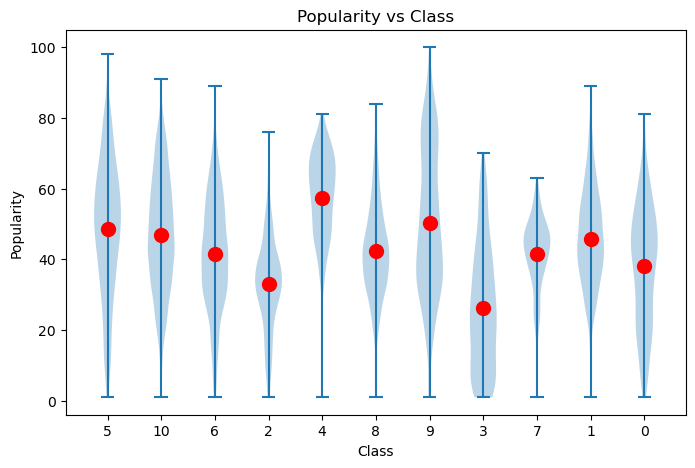

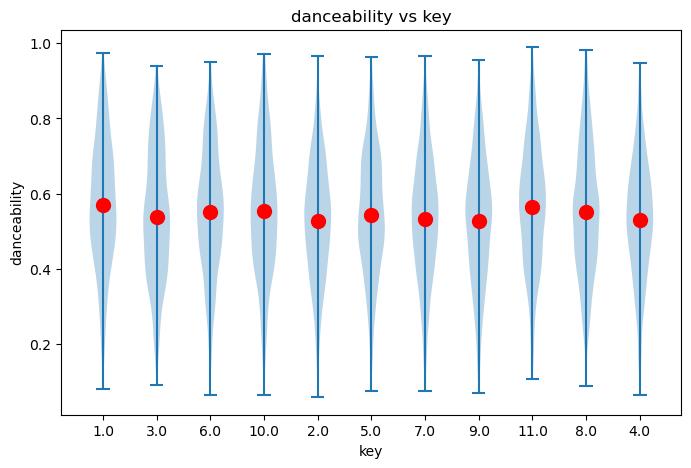

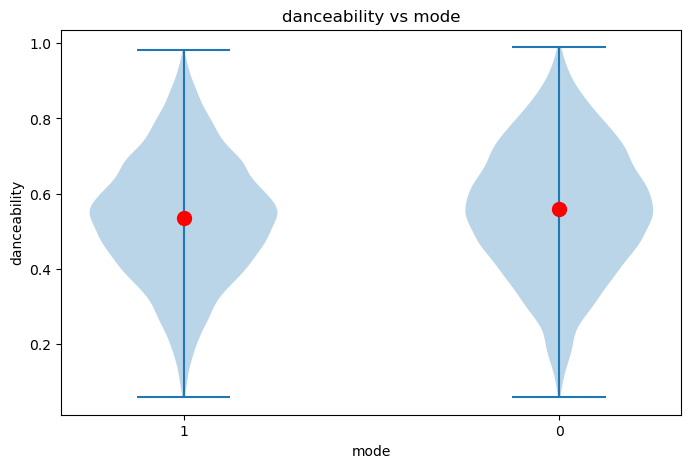

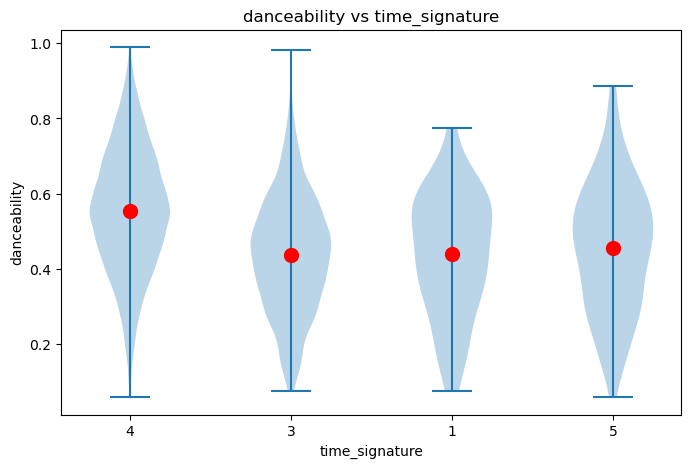

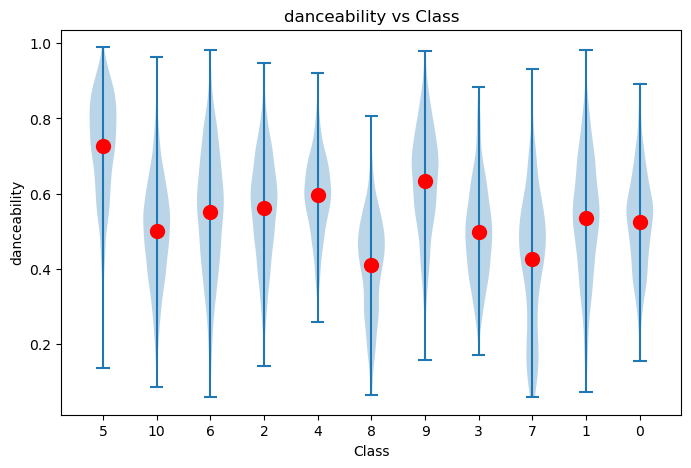

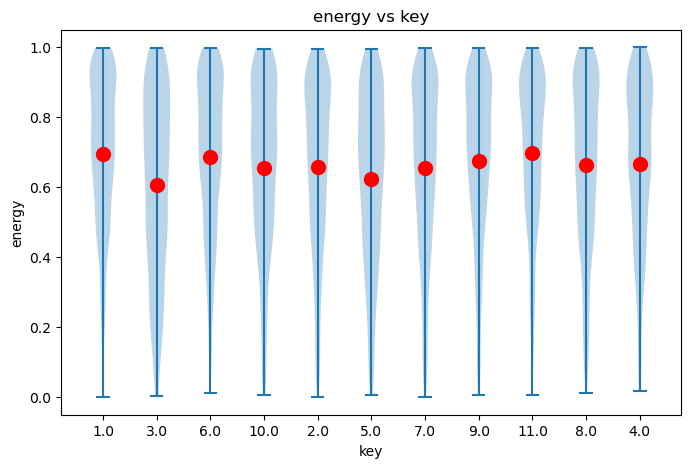

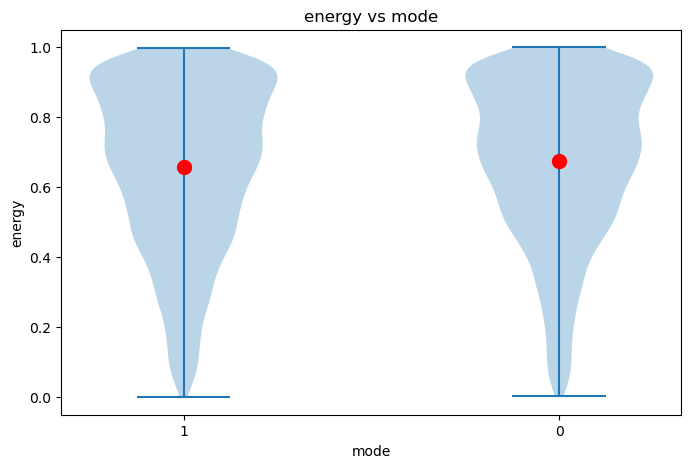

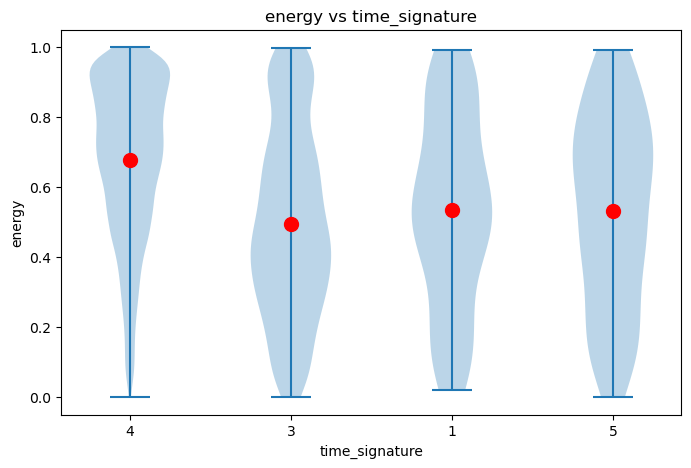

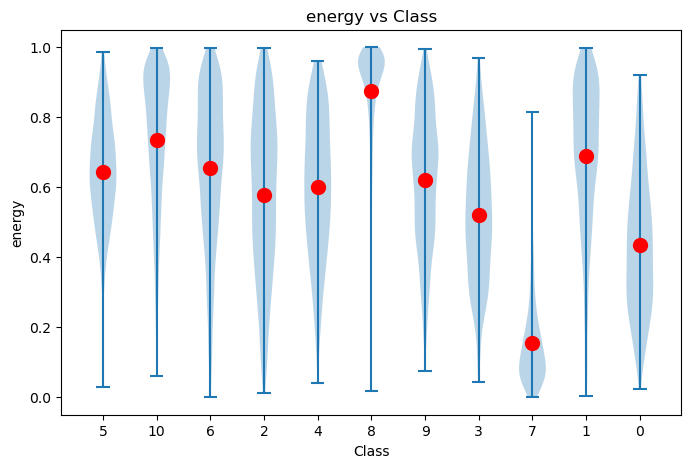

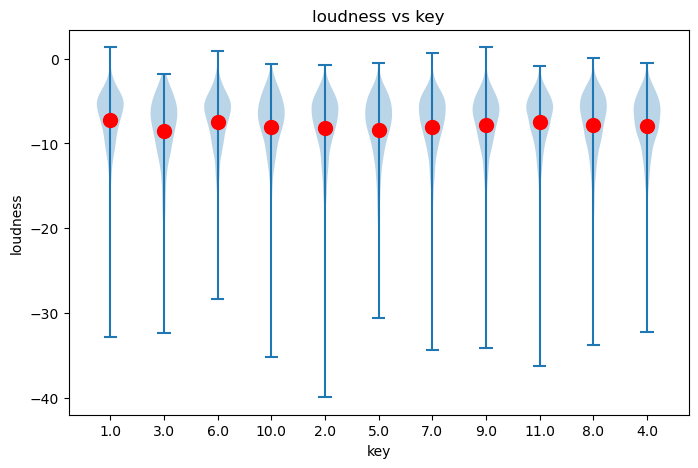

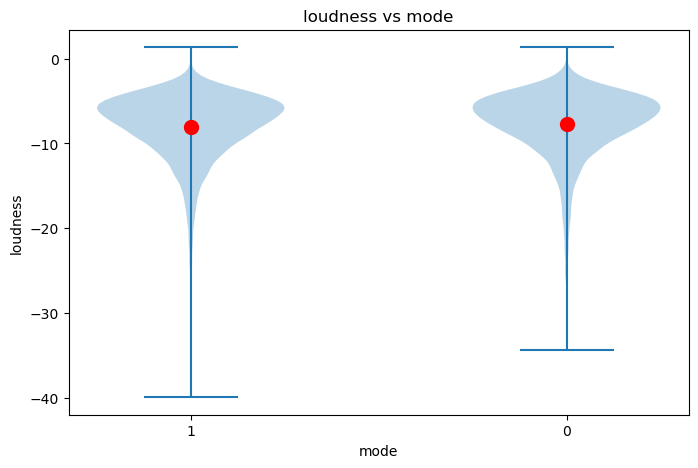

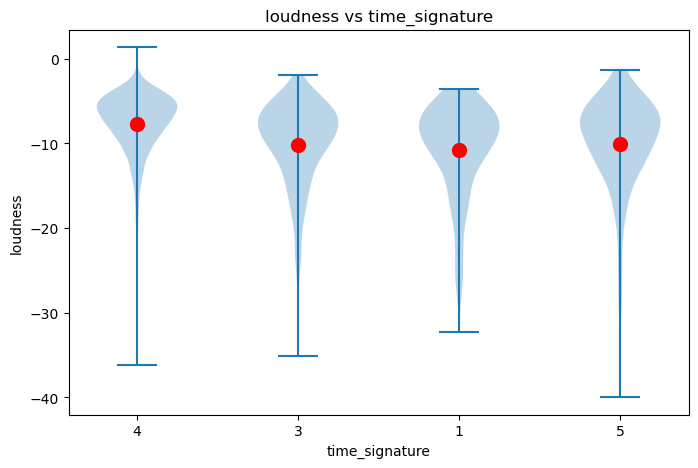

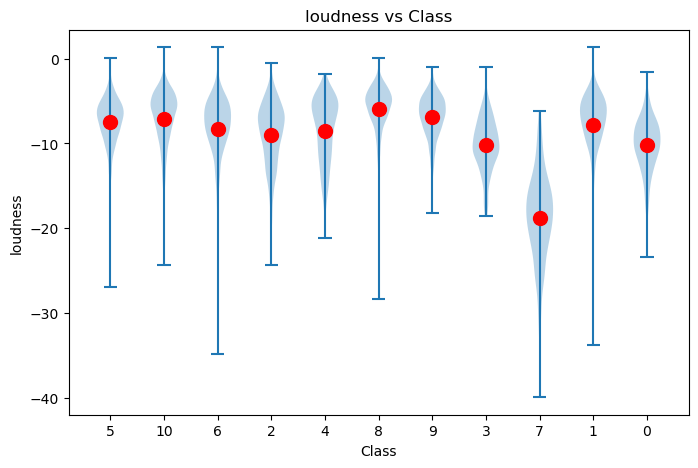

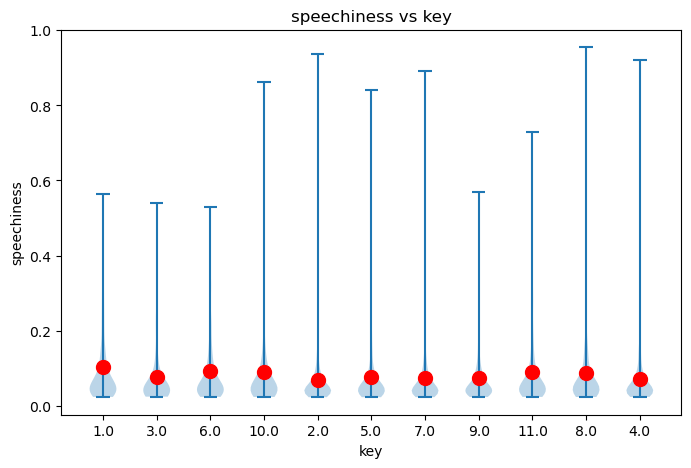

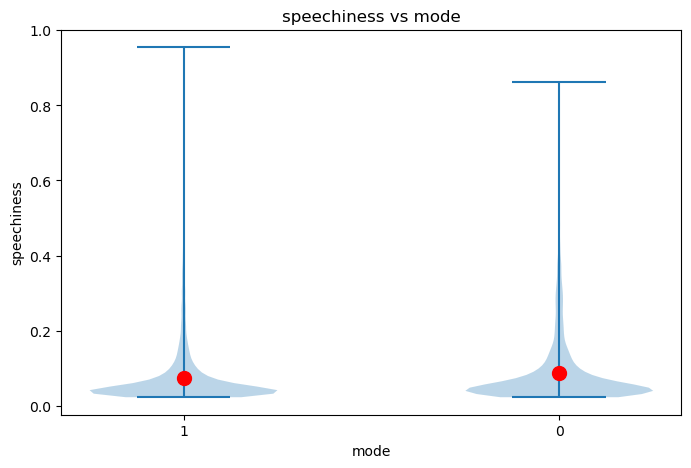

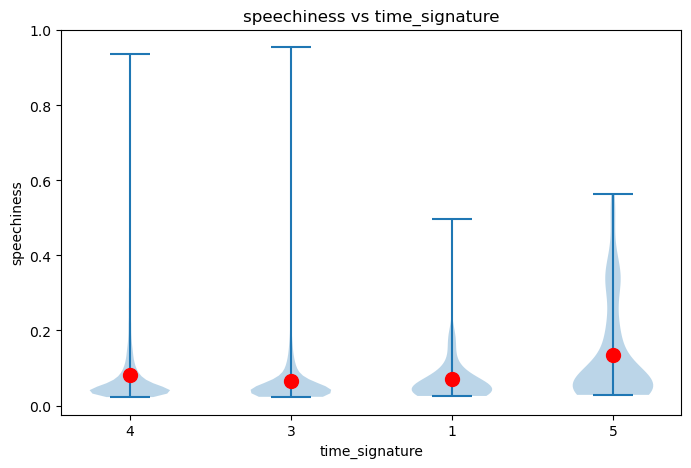

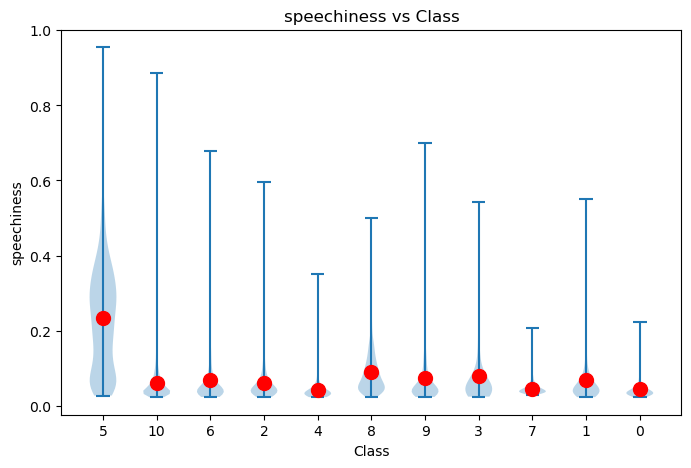

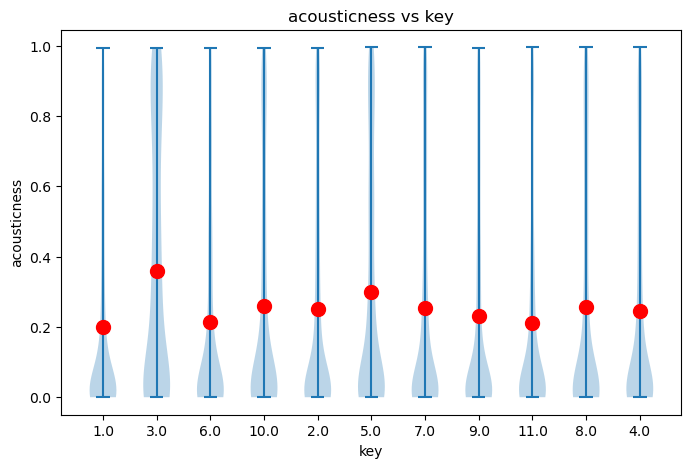

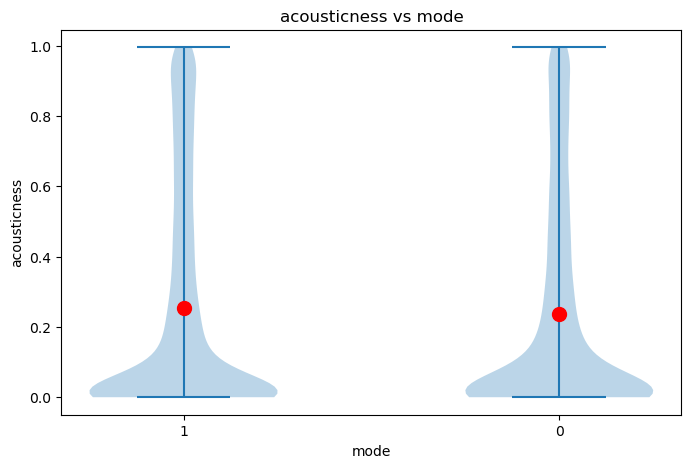

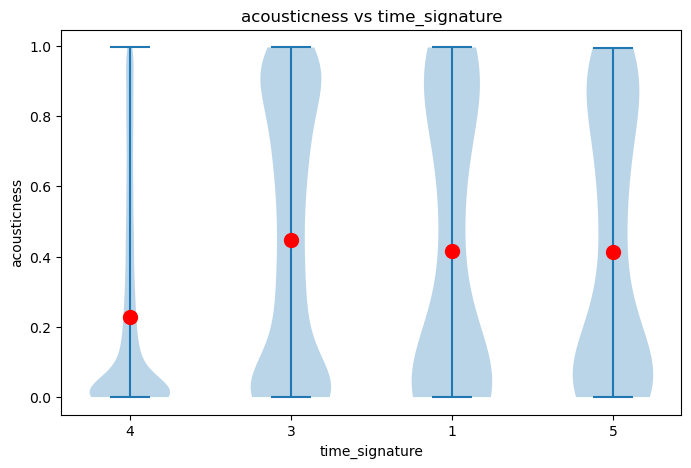

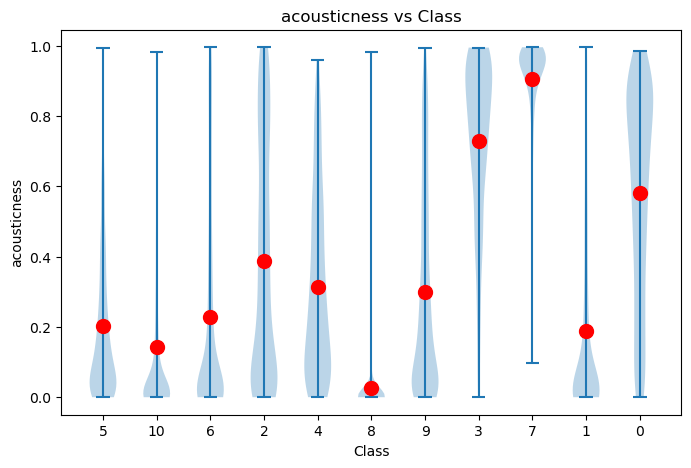

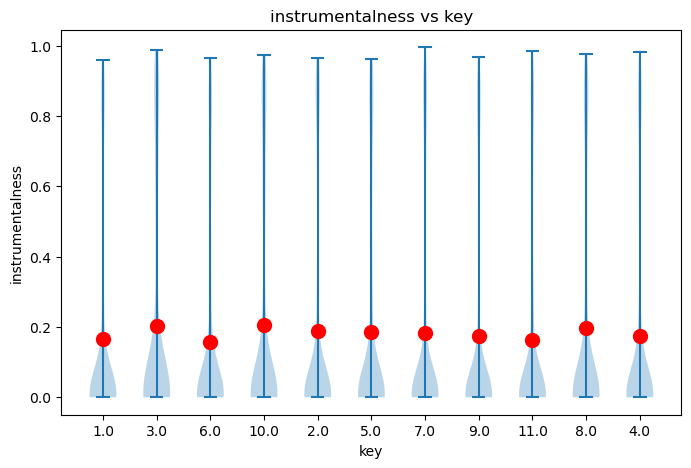

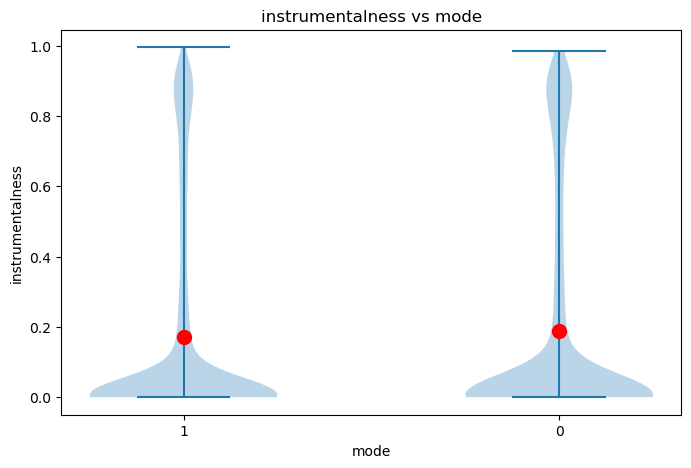

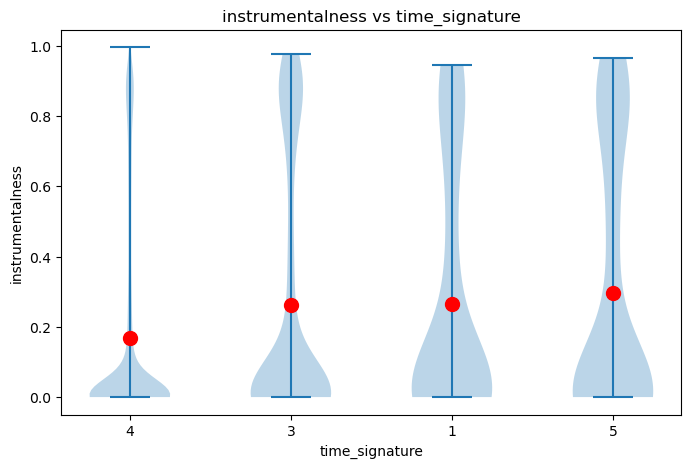

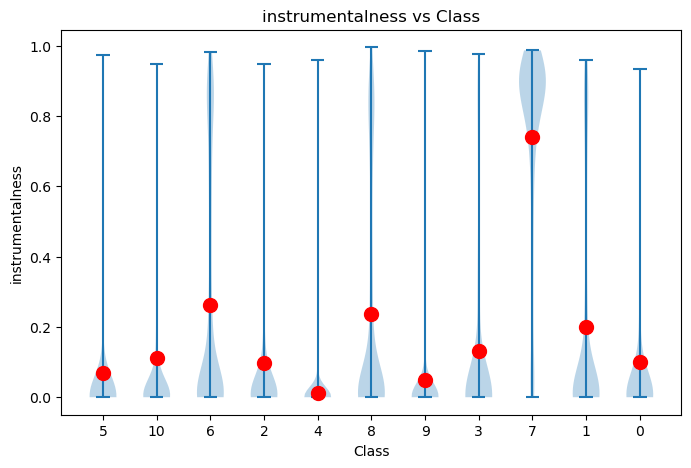

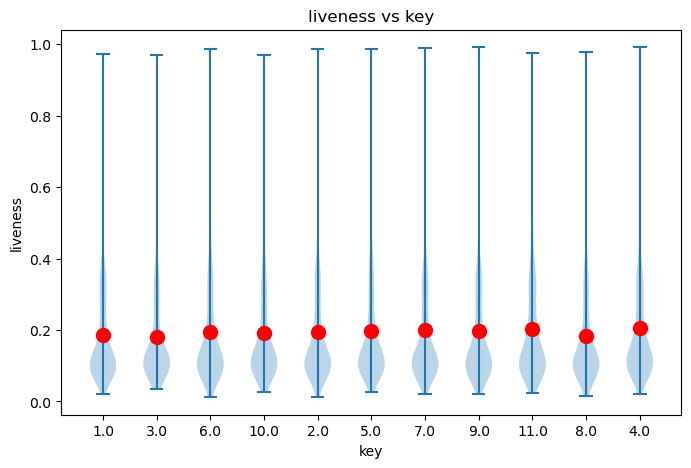

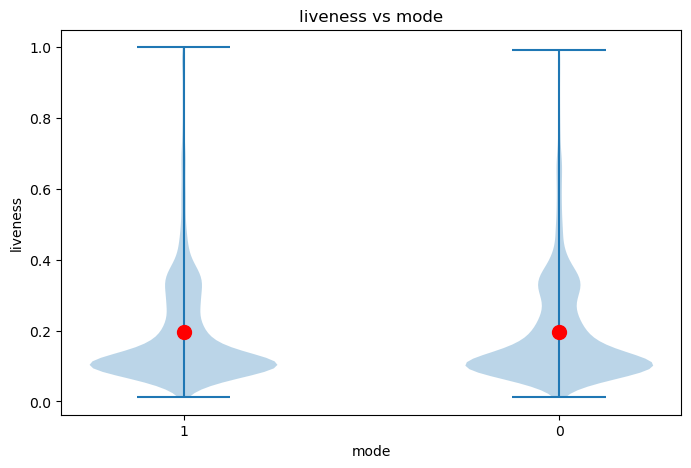

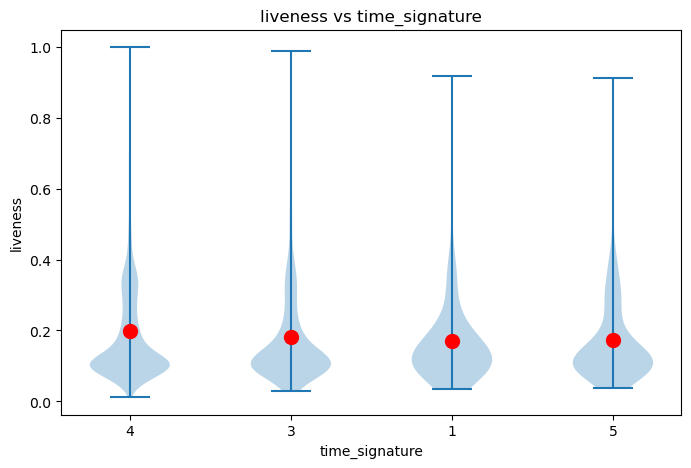

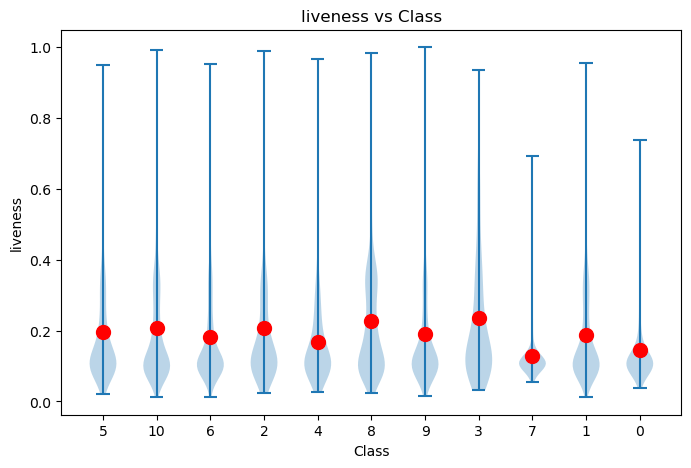

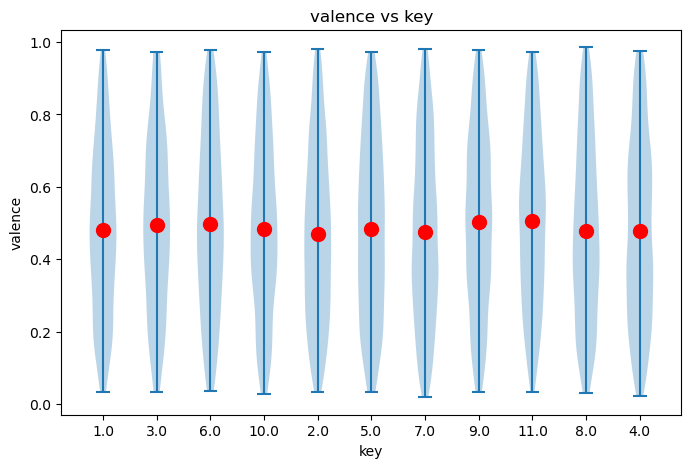

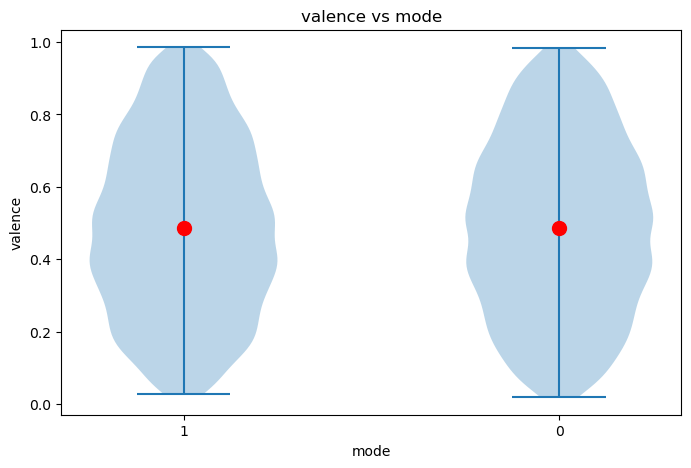

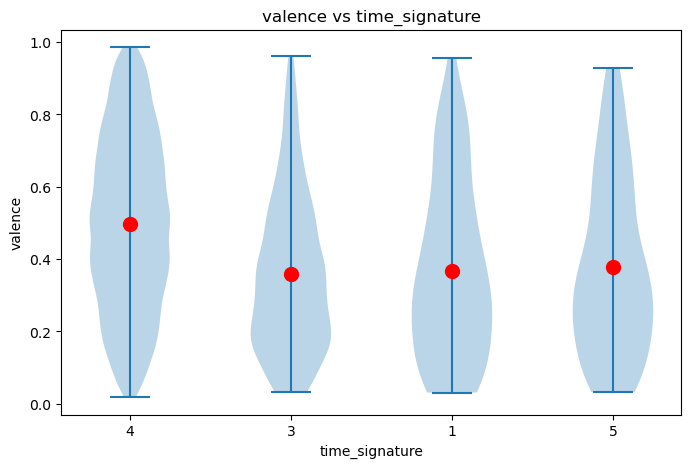

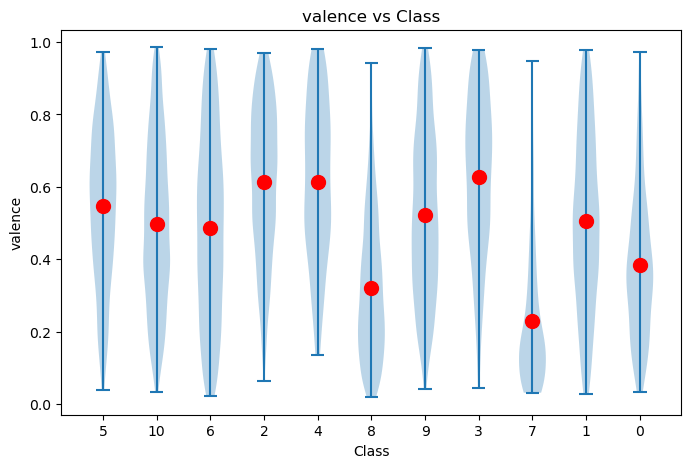

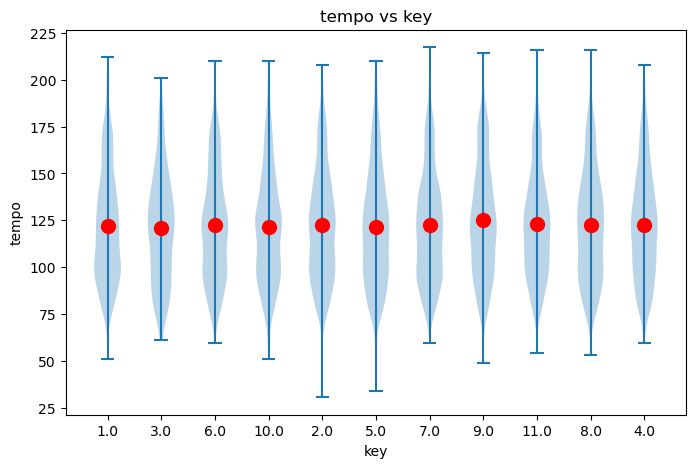

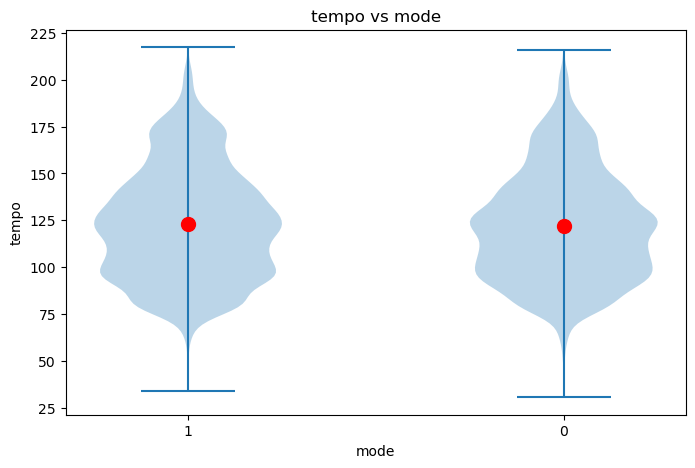

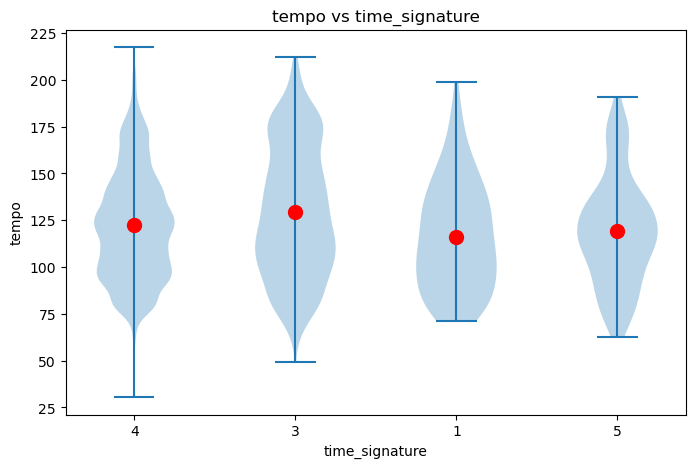

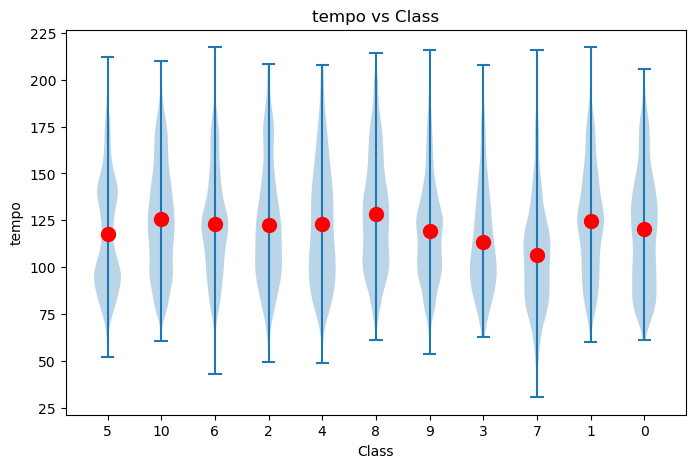

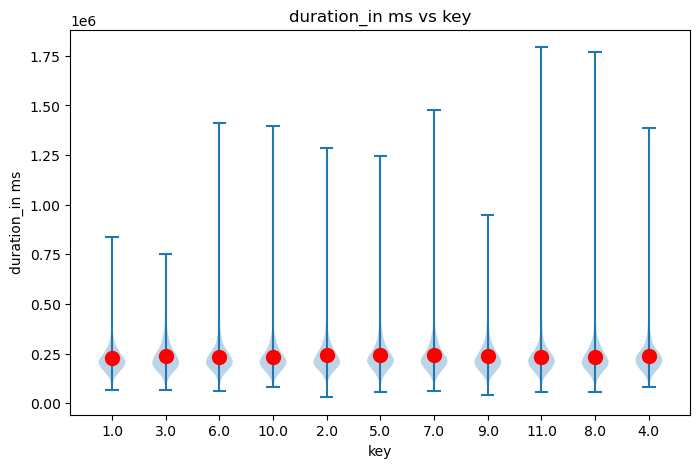

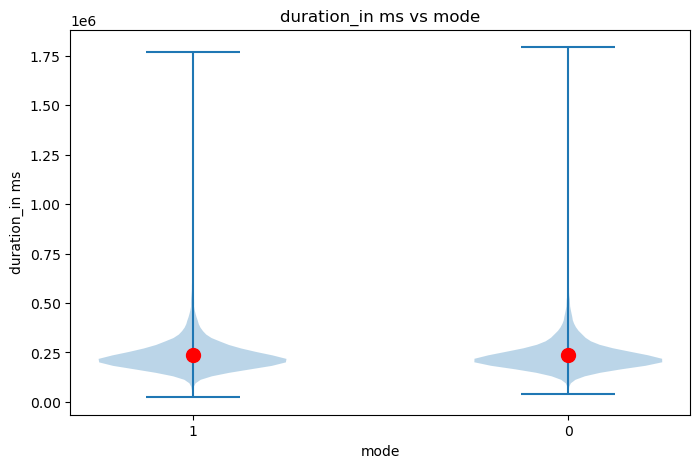

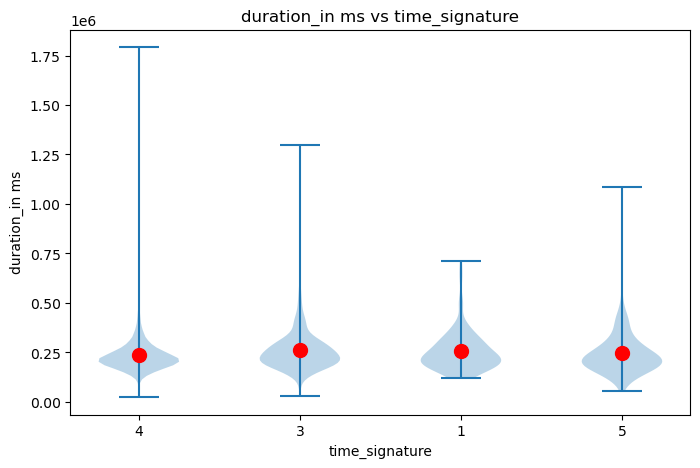

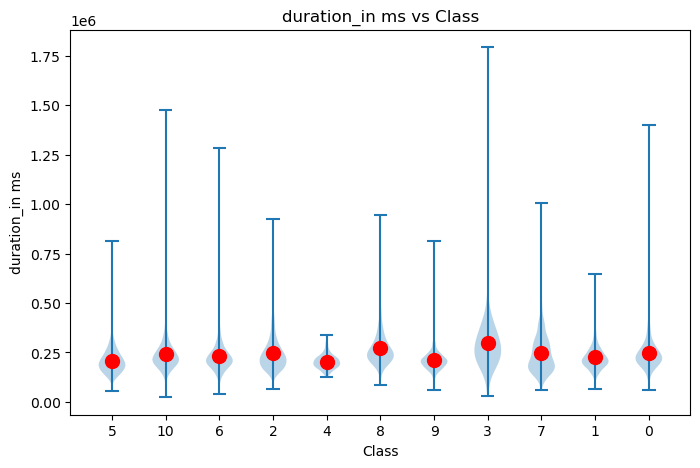

In [30]:
#violin plots
for cont_var in vars_cont:
    for cat_var in vars_cat:
        plt.figure(figsize=(8, 5))
        data = [df[cont_var][df[cat_var] == category].dropna() for category in df[cat_var].unique()]
        data = [d for d in data if len(d) > 0]
        plt.violinplot(data, positions=range(1, len(data) + 1))
        means = [d.mean() for d in data]
        #adding a mean to the violinplot
        for position, mean in zip(range(1, len(means) + 1), means):
            plt.scatter([position], [mean], color='red', label='Mean' if position == 1 else "", s=100, zorder=5)
        plt.xticks(range(1, len(data) + 1), df[cat_var].unique()[[len(df[cat_var][df[cat_var] == category]) > 0 for category in df[cat_var].unique()]])
        plt.title(f"{cont_var} vs {cat_var}")
        plt.ylabel(cont_var)
        plt.xlabel(cat_var)
        plt.show()

Interesting observations: 
(“Graphs” refer to both violin and box plots)

In the graphs showing danceability versus time_signature, the songs with 4 time_signature (namely 4/4) have a higher danceability level than other time signatures (1,3 or 5) with the highest mean, median, max/min values and first/third quartiles.

In the graphs showing danceability versus class, the songs in hiphop(5) or pop(9) have a higher danceability level than other classes as they have higher mean, median, max/min values and first/third quartiles.

In the graphs showing energy versus time_signature, the songs with 4 time_signature (namely 4/4) have a higher energy level than other time signatures (1,3 or 5) with the highest mean, median, max/min values and first/third quartiles.

In the graphs showing energy versus class, the songs in metal(8) have a higher energy level than other classes as it has higher mean, median, max/min values and first/third quartiles. On the contrary, instrumental(7) is the class with the lowest energy on a general level. 

In the graphs showing speechiness versus class, the songs in hiphop(5) have a higher speechiness level than other classes as it has higher mean, medan and maximum values.

In the graphs showing acousticness versus class, the songs in bollywood(3) and instrumental(7) have a higher acousticness level than other classes as they have higher mean, median, max/min values and first/third quartiles.

In the graphs showing instrumentalness versus class, the songs in instrumental(7), not surprisingly, have a higher instrumentalness level than other classes, while country(4), hiphop(5) and pop(9) have the lowest instrumentalness level (country is the lowest among them as it doesn’t have as many outliers having high values as hiphop or pop).

In the graphs showing liveness versus time_signature, the songs with 4 time_signature (namely 4/4) have a higher liveness level than other time signatures (1,3 or 5) with the highest mean, median, maximum value and first/third quartiles.

In the graphs showing valence versus time_signature, the songs with 4 time_signature (namely 4/4) have a higher valence level than other time signatures (1,3 or 5) with the highest mean, median, maximum value and first/third quartiles.

In the graphs showing valence versus class, the songs in metal(8) and instrumental(7) are the classes with the lowest valence on a general level (with lower mean, median, max/min values and first/third quartiles).



Part 2. Splitting and preprocessing

In [31]:
#dropping the "Artist Name" and "Track Name" columns since they do not include effective information
df = df.drop(columns=["Artist Name", "Track Name"])

In [32]:
#dealing with missing values
#first get an overview of how the missing values look like 
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print("fraction of missing values in features:")
print(perc_missing_per_ftr[perc_missing_per_ftr>0])
print("data types of the features with missing values:")
print(df[perc_missing_per_ftr[perc_missing_per_ftr>0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print("fraction of points with missing values:",frac_missing)

fraction of missing values in features:
Popularity          0.023783
key                 0.111914
instrumentalness    0.243221
dtype: float64
data types of the features with missing values:
Popularity          float64
key                 float64
instrumentalness    float64
dtype: object
fraction of points with missing values: 0.34357635030006667


In [33]:
#dealing with missing values
#df_cleaned = df.dropna()???

In [34]:
#splitting the data
#since we have an imbalanced data as we can see from the bar plot for "Class"
#and assuming the tracks are chosen randomly
#we should use a stratified split
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Class"])
y = df["Class"]
random_state = 42
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=random_state)
print('**balance with stratification:**')
print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))

**balance with stratification:**
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([ 375,  824,  763,  241,  232,  868, 1552,  346, 1113, 1514, 2969]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([125, 274, 255,  81,  78, 289, 517, 115, 370, 505, 990]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([125, 275, 254,  80,  77, 290, 518, 115, 371, 505, 990]))


As I went back to the bar plot of key features (which shows there's no 0 (C key)) and googled the key of around 100 songs out of the rows that have missing values in key and found every single one of them are written in C major/minor, I realized I should replace the missing values with 0, meaning that these songs are in C key!

In [ ]:
#preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

onehot_ftrs = ["key","mode","time_signature"]
minmax_ftrs = ["acousticness","instrumentalness"]
std_ftrs = ["Popularity","danceability","energy","loudness","speechiness","liveness","valence","tempo","duration_in ms"]
#treat missing key as C key 
#define the missing key as 0
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='constant',fill_value=0)),
('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
transformers=[
('onehot', categorical_transformer, onehot_ftrs),
('minmax', MinMaxScaler(), minmax_ftrs),
('std', StandardScaler(), std_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)
print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)
print(X_val.shape)
print(X_val_prep.shape)
print(X_val_prep)
print(X_test.shape)
print(X_test_prep.shape)
print(X_test_prep)

(10797, 14)
(10797, 29)
[[ 0.          0.          0.         ...  1.5577134  -0.78146173
   0.03847426]
 [ 0.          0.          1.         ...  1.03668756 -0.50081477
  -0.26128548]
 [ 0.          0.          0.         ... -0.426353   -0.26021207
   0.89949085]
 ...
 [ 0.          0.          0.         ...  0.86162288  0.14107332
  -0.12323082]
 [ 0.          0.          0.         ... -1.83145549  0.58196478
  -0.28871181]
 [ 1.          0.          0.         ...  1.98703869  0.19665665
  -0.07528269]]
(3599, 14)
(3599, 29)
[[ 0.          1.          0.         ... -1.69140374 -0.76733838
  -0.25429704]
 [ 0.          0.          0.         ...  1.49102209 -0.79373119
  -1.09866364]
 [ 0.          0.          0.         ... -0.58474485 -1.19966819
  -0.4940377 ]
 ...
 [ 0.          0.          0.         ... -1.31418103  0.10810758
   1.77231467]
 [ 0.          0.          0.         ... -1.20163945  0.44480978
   0.46684287]
 [ 0.          0.          0.         ...  0.7865951

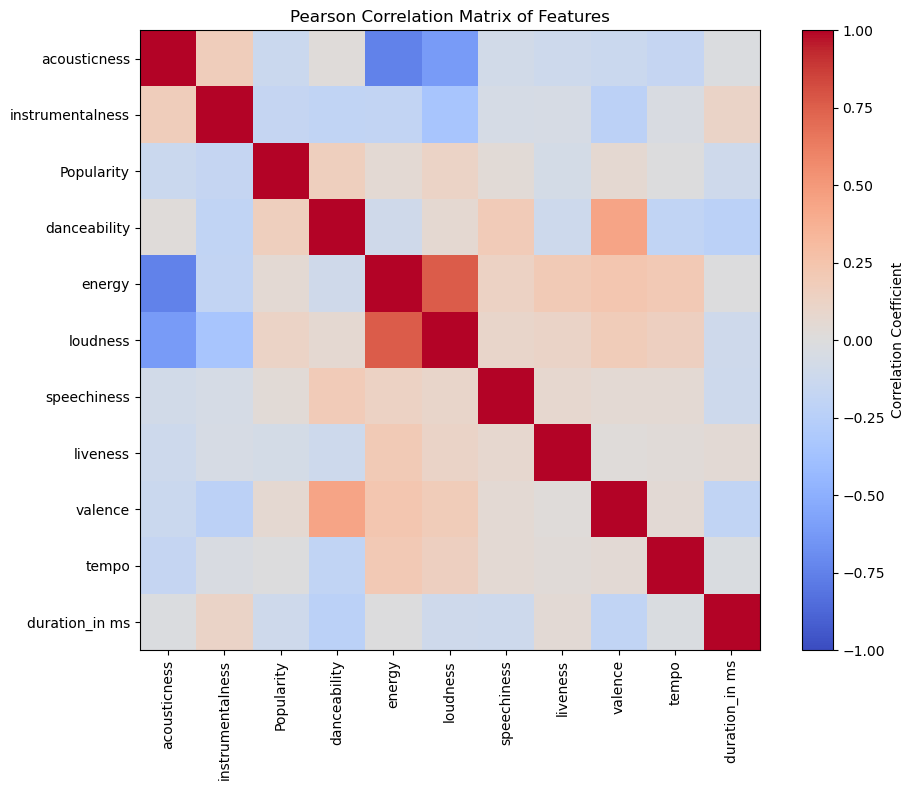

In [36]:
#correlation matrix on preprocessed train set 
#focus only on the continuous features
X_train_prep_cont = X_train_prep[:, 18:]
minmax_columns = minmax_ftrs  
std_columns = std_ftrs  
cont_columns = minmax_columns + std_columns
X_train_df = pd.DataFrame(X_train_prep_cont,columns = cont_columns)
correlation_matrix = X_train_df.corr(method="pearson", min_periods=1, numeric_only=False)
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation = 90 )
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar(label="Correlation Coefficient")
plt.title("Pearson Correlation Matrix of Features")
plt.tight_layout()
plt.show()

Findings:

Positively Correlated: energy & loudness; danceability & valence

Negatively Correlated: energy & acousticness; loudness & acousticness

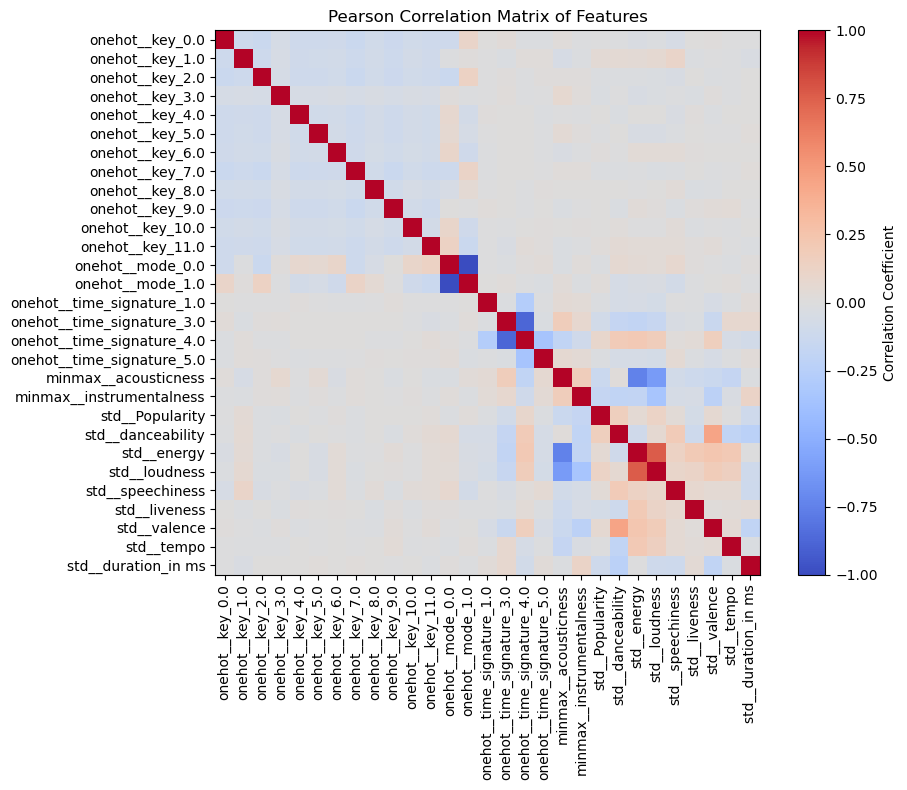

In [37]:
#A correlation matrix with all features(continuous and categorical)
colnames = preprocessor.get_feature_names_out()
X_train_df_all = pd.DataFrame(X_train_prep,columns = colnames)
correlation_matrix = X_train_df_all.corr(method="pearson", min_periods=1, numeric_only=False)
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation = 90 )
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar(label="Correlation Coefficient")
plt.title("Pearson Correlation Matrix of Features")
plt.tight_layout()
plt.show()

As we can see above, in the case of one-hot enocding for a binary categorical variable like "mode" (either major or minor mode), one of the two columns should be dropped as they are perfectly negatively correlated. Dropping one avoids introducing unnecessary redundancy into the dataset and helps prevent multicollinearity issues in models sensitive to it (like linear regression or logistic regression). This is a dummy variable trap avoidance strategy. For algorithms like decision trees or ensemble methods, the impact of reatining both columns is minimal, but for a cleaner approach I will drop one regardless.

There's also a strong negative correlation between time signature 3 and 4, indicating some redundacy generated from the one hot encoder. Dropping one of them could help simplify the model and reduce multicollinearity. 

In [38]:
#Convert the transformed arrays into DataFrames with proper column names
X_train_df = pd.DataFrame(X_train_prep, columns=colnames)
X_val_df = pd.DataFrame(X_val_prep, columns=colnames)
X_test_df = pd.DataFrame(X_test_prep, columns=colnames)

#Drop columns ('onehot__mode_0.0' and 'onehot__time_signature_3.0')
columns_to_drop = ['onehot__mode_0.0', 'onehot__time_signature_3.0']
X_train_df = X_train_df.drop(columns=columns_to_drop, axis=1)
X_val_df = X_val_df.drop(columns=columns_to_drop, axis=1)
X_test_df = X_test_df.drop(columns=columns_to_drop, axis=1)

#results
print("X_train_df shape:", X_train_df.shape)
print("X_val_df shape:", X_val_df.shape)
print("X_test_df shape:", X_test_df.shape)

X_train_df shape: (10797, 27)
X_val_df shape: (3599, 27)
X_test_df shape: (3600, 27)


Next step: Choosing an evaluation metric

1. accuracy

Accuracy is the proportion correctly classified samples out of all samples. Accuracy = (TP+TN)/(TP+FP+TN+FN). It's simple and intuitive, and works well if the dataset is balanced across all classes. However, it's not suitable for imbalanced datasets. If one genre takes up 50% of the data, a model could achieve 50% accuracy just by always predicting the majority class, even if it performs poorly on minority classes. It does not give insight into how well the model performs for individual classes. Therefore, it's not ideal for my problem given the class imbalance.

2. precision

Precision measures how many of the predicted positive samples are actually positive (Precision = TP/(TP+FP)). It's useful when false positives are more critical than false negatives. However, it doesn’t account for false negatives, so it might ignore how well the model captures minority classes. It can also be misleading for imbalanced datasets without recall. In genearl, it works well together with recall in F1 / PR curve but not as a standalone metric. 

3. recall

Recall (or TPR) measures how many of the actual positive samples are correctly identified (Recall = TP/(TP+FN)). It is useful when false negatives are more critical than false positives. It highlights how well the model identifies all examples of a given genre. However, recall ignores precision, so it might inflate performance for models that classify too many samples as positive (leading to high FP). It doesn’t account for overall classification performance. Therefore, recall is important for the imbalanced problem but should be balanced with precision using F1 / PR curve.


*In my music genre classification problem, the key issue is misclassification. Both false positives and false negatives result in the same outcome: misclassifying a song into the wrong genre. Therefore, we can say that a false positive for one genre is inherently a false negative for another genre, which means recall or precision is not ideal as the only evaluation metric.

4. f1

F1 score measures the harmonic mean of precision and recall: F1 = 2 * Precision * Recall/(Precision + Recall). It's well-suited for imbalanced datasets since it balances precision and recall. However, it doesn’t provide an intuitive sense of the overall performance of the model on all classes. Aggregating F1 scores across multiple classes can also be tricky: Macro F1 treats all classes equally Weighted F1 adjusts for class imbalance but can still be skewed by majority classes. In general, f1 is a strong candidate for my imbalanced dataset if I want to balance between identifying all genres  and minimizing misclassifications.

5. ROC_AUC 

The drawback of ROC is that it uses TN, not good for imbalanced problems. In multi-class classification (like classifying music genres here), the ROC curve and AUC are computed for each class separately. After calculating the AUC for each class individually, we need to combine them into a single score for the entire dataset. This is typically done using averaging, usually Macro-Averaging or Weighted-Averaging. For each class, that class is treated as the positive class and all the other classes are combined into a single negative class. This is the One-vs-Rest (OvR) approach, which essentially converts the multi-class problem into multiple binary problems. When we calculate the AUC for a single class, the imbalance arises because we’re comparing that one class (positive) against all other classes (negative). For example, if one genre accounts for only 10% of the data, the rest (90%) are lumped together as negatives, making the class inherently imbalanced during evaluation. When there are many True Negatives (TN), the FPR tends to be small because: FPR = FP/(FP+TN), even if the model makes many False Positive predictions (FP), the large TN denominator keeps the FPR small. The TPR is independent of TN because TPR = TP/(TP+FN). For imbalanced datasets, the x-axis (FPR) doesn’t expand much, even as False Positives increase, due to the overwhelming number of True Negatives. This compresses the ROC curve horizontally, making the curve appear steeper toward the top-left corner, even if the model isn’t truly good at distinguishing the minority class. The area under the curve (AUC) becomes artificially inflated. The ROC curve would look better than it actually is.


6. precison-recall curve

This is beter than ROC_AUC.

The Precision-Recall (PR) curve and its associated PR-AUC (area under the PR curve) are better for imbalanced datasets because they focus only on the positive class and do not involve True Negatives (TN). Precision measures how many of the predicted positive samples are actually positive (Precision = TP/(TP+FP)), and Recall (or TPR) measures how many of the actual positive samples are correctly identified (Recall = TP/(TP+FN)). Unlike the ROC curve, which uses True Negatives (TN) in the calculation of FPR, the PR curve focuses only on TP, FP, and FN. PR curves emphasize how well the model identifies the minority (positive) class, which is often the focus in imbalanced datasets. For multi-class problems , the PR curve is extended using the One-vs-Rest (OvR) method: Compute the PR curve for each class individually (treating that class as positive and all others as negative);Combine the results using macro-averaging or weighted-averaging, just like with the ROC curve.

7. Logloss (FINAL CHOICE)

### <center>$$logloss = - \frac{1}{m}\sum_{i=0}^{m-1} (y_{i, true}\ln(p_{i, pred}) + (1-y_{i, true})\ln(1-p_{i, pred}))$$</center>

Log loss measures the accuracy of probability predictions, not just the final class predictions. It penalizes predictions that are both: Confidently wrong(If a model predicts a probability close to 1 for the wrong class, the penalty is very high, Log loss is particularly harsh in such cases, as the penalty grows exponentially as the predicted probability for the true class approaches 0); underconfident or uncalibrated for the true class(If the predicted probability for the true class is too low, log loss penalizes the model. This happens even if the prediction is technically correct because the confidence level does not align with the model’s certainty based on the features.).

Usually, when we convert probabilities into classes (e.g., 0.8 → “Jazz” and 0.3 → “Rock”), we lose valuable information about uncertainty. However, log loss avoids this by evaluating the full probability distribution. This is especially useful in situations where we need to rank predictions (e.g. in a music recommendation system, we want to rank songs by their likelihood of belonging to a specific genre) or handle cost-sensitive decisions. 

I decided to use logloss as my final evaluation metric since for a multi-class problem like mine, we care about the model’s confidence in assigning a genre rather than just the final prediction; Log loss penalizes confident errors, ensuring the model doesn’t overfit to majority genres at the cost of minority genres, dealing with the imbalance in the dataset; what's more, for music classification, real world applications involve ranking songs by their probability of belonging to a genre (e.g., for recommendations), and this makes log loss an ideal metric.

*Log loss inherently works for multi-class problems without the need to split the classes into a binary “one-vs-rest” mindset, which could be another benefit of using it too. It automatically focuses on the predicted probability for the correct class while ignoring probabilities for incorrect classes. It penalizes predictions that assign low probabilities to the true class, regardless of the probabilities assigned to the incorrect classes.

8. Mean Squared Error (MSE) and R2: Regression metrics only apply to continuous target variables.




NEXT STEP: Trying different model/algorithms and recreating pipelines for cross validation

1. Logistic Regression

(I want to use L2 regularization or elastic net (a combination of L1 and L2) as the regularization method here since I want to shrink coefficients toward 0 of some features but I don't want to unnecessarily eliminate features entirely.)

2. Random Forest Classification

3. SVM rbf Classification

4. XGBoost (deals with missing data better)

5. K-Nearest Neighbors (KNN) classifier

I will use logloss as the main evluation metric for model selection, but I'll also provide accuracy as a complementary metric since Log loss evaluates how well the model predicts probabilities but doesn’t directly assess the final class predictions. Accuracy shows how often the predicted class matches the true label, which can be more intuitive for stakeholders or practical applications. A low log loss indicates well-calibrated probabilities, but accuracy helps understand how that translates to actual predictions.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np
import xgboost as xgb

#Define a columndropper to drop the unwanted columns after preprocessing
class ColumnDropper:
    def __init__(self, columns_to_drop=None):
        self.columns_to_drop = columns_to_drop
        self.feature_names_in_ = None

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = X.columns.tolist()
        return self

    def transform(self, X):
        if self.columns_to_drop:
            # Ensure X is a DataFrame
            if isinstance(X, np.ndarray):
                X = pd.DataFrame(X, columns=self.feature_names_in_)
            return X.drop(columns=self.columns_to_drop, errors="ignore")
        return X

#Return baseline logloss and baseline accuracy scores as a reference
def calculate_baseline_scores(y):
    class_counts = y.value_counts(normalize=True)
    baseline_accuracy = class_counts.max()
    baseline_logloss = -np.sum(class_counts * np.log(class_counts))
    return baseline_accuracy, baseline_logloss


def main_pipeline(data_path):
    #Load data
    df = pd.read_csv(data_path)
    df = df.drop(columns=['Artist Name', 'Track Name'], errors='ignore')
    
    #Unify the unit of the duration column
    df["duration_in min/ms"] = np.where(df["duration_in min/ms"] < 100, df["duration_in min/ms"] * 60000, df["duration_in min/ms"])
    df.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace=True)
    
    #Preprocessing pipeline
    onehot_ftrs = ["key", "mode", "time_signature"]
    minmax_ftrs = ["acousticness", "instrumentalness"]
    std_ftrs = [
        "Popularity", "danceability", "energy", "loudness", "speechiness",
        "liveness", "valence", "tempo", "duration_in ms"
    ]

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ])

    #Parameter grid for hyperparameter tuning
    param_grid = {
        "reg_alpha": [1e-1, 1e0, 1e1, 1e2],
        "reg_lambda": [1e-1, 1e0, 1e1, 1e2],
        "max_depth": [3, 10, 15]
    }

    #Initialize lists to store results
    logloss_scores = []
    accuracy_scores = []
    best_models = []

    #Calculate and print baseline scores
    target = "Class" 
    baseline_accuracy, baseline_logloss = calculate_baseline_scores(df[target])
    print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
    print(f"Baseline Log Loss: {baseline_logloss:.4f}")

    #Loop over 5 different random states
    for random_state in range(5):
        print(f"\nRandom State {random_state}: Starting...")

        #Define target and features
        X = df.drop(columns=[target])
        y = df[target]

        #Split data into other and test sets
        X_other, X_test, y_other, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state, stratify=y)

        #Prepare K-Fold cross-validation
        kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

        #Initialize variables for the best model
        best_score = float("inf")
        best_params = None
        best_model = None

        #Iterate over parameter grid
        for params_idx, params in enumerate(ParameterGrid(param_grid)):
            print(f"Random State {random_state}, Parameter Set {params_idx + 1}/{len(ParameterGrid(param_grid))}: {params}")
            fold_scores = []

            #Perform K-Fold cross-validation (manual)
            for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_other)):
                print(f"    Fold {fold_idx + 1}/{kf.get_n_splits()} in progress...")
                # Train/validation split for this fold
                X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
                y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]

                #Fit preprocessor on the training set only
                preprocessor.fit(X_train)

                #Transform both training and validation sets
                X_train_prep = preprocessor.transform(X_train)
                X_val_prep = preprocessor.transform(X_val)

                #Get feature names and drop unnecessary columns
                feature_names = preprocessor.get_feature_names_out()
                X_train_prep = pd.DataFrame(X_train_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')
                X_val_prep = pd.DataFrame(X_val_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

                #Convert to DMatrix for XGBoost
                dtrain = xgb.DMatrix(X_train_prep, label=y_train)
                dval = xgb.DMatrix(X_val_prep, label=y_val)

                # Set XGBoost parameters
                xgb_params = {
                    "learning_rate": 0.03,
                    "colsample_bytree": 0.9,
                    "subsample": 0.66,
                    "objective": "multi:softprob",
                    "eval_metric": "mlogloss",
                    "num_class": len(np.unique(y_train)),
                    "n_jobs": -1,
                    "random_state": random_state,
                    **params
                }

                #Train the model with early stopping
                model = xgb.train(
                    params=xgb_params,
                    dtrain=dtrain,
                    num_boost_round=1000,
                    evals=[(dval, "validation")],
                    early_stopping_rounds=50,
                    verbose_eval=False
                )

                #Evaluate log loss on validation set
                val_pred = model.predict(dval)
                fold_log_loss = log_loss(y_val, val_pred)
                fold_scores.append(fold_log_loss)

            # Average log loss across folds
            avg_log_loss = np.mean(fold_scores)

            # Update the best model if current is better
            if avg_log_loss < best_score:
                best_score = avg_log_loss
                best_params = params
                best_model = model

        #Evaluate the best model on the test set
        X_test_prep = preprocessor.transform(X_test)
        X_test_prep = pd.DataFrame(X_test_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')
        dtest = xgb.DMatrix(X_test_prep, label=y_test)

        y_test_proba = best_model.predict(dtest)
        y_test_pred = np.argmax(y_test_proba, axis=1)
        test_logloss = log_loss(y_test, y_test_proba)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        logloss_scores.append(test_logloss)
        accuracy_scores.append(test_accuracy)
        best_models.append(best_params)

        print(f"Random State {random_state}: Best Log Loss = {test_logloss:.4f}, Test Accuracy = {test_accuracy:.4f}")
    average_logloss = np.mean(logloss_scores)
    std_logloss = np.std(logloss_scores)  
    average_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)

    #Final results
    print("\nFinal Results:")
    print("Log Loss Scores:", logloss_scores)
    print("Accuracy Scores:", accuracy_scores)
    print("Best Model Parameters:", best_models)
    print(f"\nAverage Log Loss across random states: {average_logloss:.4f}")
    print(f"Log Loss Standard Deviation: {std_logloss:.4f}")
    print(f"Average Test Accuracy across random states: {average_accuracy:.4f}")
    print(f"Test Accuracy Standard Deviation: {std_accuracy:.4f}")


    #Return results
    return {
        'Best Models': best_models,
        'Log Loss Scores': logloss_scores,
        'Accuracy Scores': accuracy_scores,
        'Average Log Loss': average_logloss,
        'Log Loss Std Dev': std_logloss,
        'Average Test Accuracy': average_accuracy,
        'Accuracy Std Dev': std_accuracy
}

#Run pipeline
if __name__ == "__main__":
    data_path = 'music.csv'
    results = main_pipeline(data_path)
    print("Pipeline completed.")

Baseline Accuracy: 0.2750
Baseline Log Loss: 2.1241

Random State 0: Starting...
Random State 0, Parameter Set 1/48: {'max_depth': 3, 'reg_alpha': 0.1, 'reg_lambda': 0.1}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 2/48: {'max_depth': 3, 'reg_alpha': 0.1, 'reg_lambda': 1.0}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 3/48: {'max_depth': 3, 'reg_alpha': 0.1, 'reg_lambda': 10.0}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 4/48: {'max_depth': 3, 'reg_alpha': 0.1, 'reg_lambda': 100.0}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 5/48: {'max_depth': 3, 'reg_alpha': 1.0, 'reg_lambda': 0.1}
    Fold 1/4 in pr

In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np


#Define a columndropper to drop the unwanted columns after preprocessing
class ColumnDropper:
    def __init__(self, columns_to_drop=None):
        self.columns_to_drop = columns_to_drop
        self.feature_names_in_ = None

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = X.columns.tolist()
        return self

    def transform(self, X):
        if self.columns_to_drop:
            #Ensure X is a DataFrame
            if isinstance(X, np.ndarray):
                X = pd.DataFrame(X, columns=self.feature_names_in_)
            return X.drop(columns=self.columns_to_drop, errors="ignore")
        return X


#Return baseline logloss and baseline accuracy scores as a reference
def calculate_baseline_scores(y):
    class_counts = y.value_counts(normalize=True)
    baseline_accuracy = class_counts.max()
    baseline_logloss = -np.sum(class_counts * np.log(class_counts))
    return baseline_accuracy, baseline_logloss


def main_pipelinerfc(data_path):
    #Load data
    df = pd.read_csv(data_path)
    df = df.drop(columns=['Artist Name', 'Track Name'], errors='ignore')
    
    #Unify the unit of the duration column
    df["duration_in min/ms"] = np.where(df["duration_in min/ms"] < 100, df["duration_in min/ms"] * 60000, df["duration_in min/ms"])
    df.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace=True)
    
    #Preprocessing pipeline
    onehot_ftrs = ["key", "mode", "time_signature"]
    minmax_ftrs = ["acousticness", "instrumentalness"]
    std_ftrs = [
        "Popularity", "danceability", "energy", "loudness", "speechiness",
        "liveness", "valence", "tempo", "duration_in ms"
    ]

    #Preprocessing transformers
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  #Handle categorical missing values
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])

    minmax_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical features in minmax_ftrs
        ('scaler', MinMaxScaler())
    ])

    numerical_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical data
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),  #categorical features
        ('minmax', minmax_transformer, minmax_ftrs),       #minmax features with imputation
        ('std', numerical_transformer, std_ftrs)          #other numerical features with imputation
    ])

    #Parameter grid for hyperparameter tuning
    param_grid = {
        "max_depth": [1, 3, 10, 30, 100],  #Logarithmically spaced
        "max_features": [0.25, 0.5, 0.75, 1.0],  #Linearly spaced
    }

    #Initialize lists to store results
    logloss_scores = []
    accuracy_scores = []
    best_models = []

    #Calculate and print baseline scores
    target = "Class"  
    baseline_accuracy, baseline_logloss = calculate_baseline_scores(df[target])
    print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
    print(f"Baseline Log Loss: {baseline_logloss:.4f}")

    #Loop over 5 different random states
    for random_state in range(5):
        print(f"\nRandom State {random_state}: Starting...")

        #Define target and features
        X = df.drop(columns=[target])
        y = df[target]

        #Split data into other and test sets
        X_other, X_test, y_other, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state, stratify=y)

        #Prepare K-Fold cross-validation
        kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

        #Initialize variables for the best model
        best_score = float("inf")
        best_params = None
        best_model = None

        #Iterate over parameter grid
        for params_idx, params in enumerate(ParameterGrid(param_grid)):
            print(f"Random State {random_state}, Parameter Set {params_idx + 1}/{len(ParameterGrid(param_grid))}: {params}")
            fold_scores = []

            #Perform K-Fold cross-validation (manual)
            for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_other)):
                print(f"    Fold {fold_idx + 1}/{kf.get_n_splits()} in progress...")
                #Train/validation split for this fold
                X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
                y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]

                #Fit preprocessor on the training set only
                preprocessor.fit(X_train)

                #Transform both training and validation sets
                X_train_prep = preprocessor.transform(X_train)
                X_val_prep = preprocessor.transform(X_val)

                #Get feature names and drop unnecessary columns
                feature_names = preprocessor.get_feature_names_out()
                X_train_prep = pd.DataFrame(X_train_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')
                X_val_prep = pd.DataFrame(X_val_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

                #Train the Random Forest model
                model = RandomForestClassifier(
                    max_depth=params["max_depth"],
                    max_features=params["max_features"],
                    random_state=random_state,
                    n_jobs=-1
                )

                #Train and predict on validation set
                model.fit(X_train_prep, y_train)
                val_pred_proba = model.predict_proba(X_val_prep)
                fold_log_loss = log_loss(y_val, val_pred_proba)
                fold_scores.append(fold_log_loss)

            #Average log loss across folds
            avg_log_loss = np.mean(fold_scores)

            #Update the best model if current is better
            if avg_log_loss < best_score:
                best_score = avg_log_loss
                best_params = params
                best_model = model

        #Evaluate the best model on the test set
        X_test_prep = preprocessor.transform(X_test)
        X_test_prep = pd.DataFrame(X_test_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

        y_test_proba = best_model.predict_proba(X_test_prep)
        y_test_pred = best_model.predict(X_test_prep)
        test_logloss = log_loss(y_test, y_test_proba)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        logloss_scores.append(test_logloss)
        accuracy_scores.append(test_accuracy)
        best_models.append(best_params)

        print(f"Random State {random_state}: Best Log Loss = {test_logloss:.4f}, Test Accuracy = {test_accuracy:.4f}")
    
    average_logloss = np.mean(logloss_scores)
    std_logloss = np.std(logloss_scores)  
    average_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)

    #Final results
    print("\nFinal Results:")
    print("Log Loss Scores:", logloss_scores)
    print("Accuracy Scores:", accuracy_scores)
    print("Best Model Parameters:", best_models)
    print(f"\nAverage Log Loss across random states: {average_logloss:.4f}")
    print(f"Log Loss Standard Deviation: {std_logloss:.4f}")
    print(f"Average Test Accuracy across random states: {average_accuracy:.4f}")
    print(f"Test Accuracy Standard Deviation: {std_accuracy:.4f}")


    #Return results
    return {
        'Best Models': best_models,
        'Log Loss Scores': logloss_scores,
        'Accuracy Scores': accuracy_scores,
        'Average Log Loss': average_logloss,
        'Log Loss Std Dev': std_logloss,
        'Average Test Accuracy': average_accuracy,
        'Accuracy Std Dev': std_accuracy
}


#Run pipeline
if __name__ == "__main__":
    data_path = 'music.csv'
    results = main_pipelinerfc(data_path)
    print("Pipeline completed.")

Baseline Accuracy: 0.2750
Baseline Log Loss: 2.1241

Random State 0: Starting...
Random State 0, Parameter Set 1/20: {'max_depth': 1, 'max_features': 0.25}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 2/20: {'max_depth': 1, 'max_features': 0.5}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 3/20: {'max_depth': 1, 'max_features': 0.75}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 4/20: {'max_depth': 1, 'max_features': 1.0}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 5/20: {'max_depth': 3, 'max_features': 0.25}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 i

In [ ]:
#SVM cfl
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np


#Define a columndropper to drop the unwanted columns after preprocessing
class ColumnDropper:
    def __init__(self, columns_to_drop=None):
        self.columns_to_drop = columns_to_drop
        self.feature_names_in_ = None

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = X.columns.tolist()
        return self

    def transform(self, X):
        if self.columns_to_drop:
            #Ensure X is a DataFrame
            if isinstance(X, np.ndarray):
                X = pd.DataFrame(X, columns=self.feature_names_in_)
            return X.drop(columns=self.columns_to_drop, errors="ignore")
        return X


#Return baseline logloss and baseline accuracy scores as a reference
def calculate_baseline_scores(y):
    class_counts = y.value_counts(normalize=True)
    baseline_accuracy = class_counts.max()
    baseline_logloss = -np.sum(class_counts * np.log(class_counts))
    return baseline_accuracy, baseline_logloss


def main_pipelinesvm(data_path):
    #Load data
    df = pd.read_csv(data_path)
    df = df.drop(columns=['Artist Name', 'Track Name'], errors='ignore')
    
    #Unify the unit of the duration column
    df["duration_in min/ms"] = np.where(df["duration_in min/ms"] < 100, df["duration_in min/ms"] * 60000, df["duration_in min/ms"])
    df.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace=True)
    
    #Preprocessing pipeline
    onehot_ftrs = ["key", "mode", "time_signature"]
    minmax_ftrs = ["acousticness", "instrumentalness"]
    std_ftrs = [
        "Popularity", "danceability", "energy", "loudness", "speechiness",
        "liveness", "valence", "tempo", "duration_in ms"
    ]

    #Preprocessing transformers
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  # Handle categorical missing values
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])

    minmax_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical features in minmax_ftrs
        ('scaler', MinMaxScaler())
    ])

    numerical_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical data
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),  #categorical features
        ('minmax', minmax_transformer, minmax_ftrs),       #minmax features with imputation
        ('std', numerical_transformer, std_ftrs)          #other numerical features with imputation
    ])

    #Parameter grid for hyperparameter tuning
    param_grid = {
        "C": [0.1, 1, 10, 100],        # Regularization parameter
        "gamma": [0.001, 0.01, 0.1, 1]  # Kernel coefficient
    }

    #Initialize lists to store results
    logloss_scores = []
    accuracy_scores = []
    best_models = []

    #Calculate and print baseline scores
    target = "Class"  
    baseline_accuracy, baseline_logloss = calculate_baseline_scores(df[target])
    print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
    print(f"Baseline Log Loss: {baseline_logloss:.4f}")

    #Loop over 5 different random states
    for random_state in range(5):
        print(f"\nRandom State {random_state}: Starting...")

        #Define target and features
        X = df.drop(columns=[target])
        y = df[target]

        #Split data into other and test sets
        X_other, X_test, y_other, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state, stratify=y)

        #Prepare K-Fold cross-validation
        kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

        #Initialize variables for the best model
        best_score = float("inf")
        best_params = None
        best_model = None

        #Iterate over parameter grid
        for params_idx, params in enumerate(ParameterGrid(param_grid)):
            print(f"Random State {random_state}, Parameter Set {params_idx + 1}/{len(ParameterGrid(param_grid))}: {params}")
            fold_scores = []

            #Perform K-Fold cross-validation (manual)
            for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_other)):
                print(f"    Fold {fold_idx + 1}/{kf.get_n_splits()} in progress...")
                #Train/validation split for this fold
                X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
                y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]

                #Fit preprocessor on the training set only
                preprocessor.fit(X_train)

                #Transform both training and validation sets
                X_train_prep = preprocessor.transform(X_train)
                X_val_prep = preprocessor.transform(X_val)

                #Get feature names and drop unnecessary columns
                feature_names = preprocessor.get_feature_names_out()
                X_train_prep = pd.DataFrame(X_train_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')
                X_val_prep = pd.DataFrame(X_val_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

                #Train the SVM model
                model = SVC(
                    C=params["C"],
                    gamma=params["gamma"],
                    kernel="rbf",
                    probability=True,
                    random_state=random_state
                )

                #Train and predict on validation set
                model.fit(X_train_prep, y_train)
                val_pred_proba = model.predict_proba(X_val_prep)
                fold_log_loss = log_loss(y_val, val_pred_proba)
                fold_scores.append(fold_log_loss)

            #Average log loss across folds
            avg_log_loss = np.mean(fold_scores)

            #Update the best model if current is better
            if avg_log_loss < best_score:
                best_score = avg_log_loss
                best_params = params
                best_model = model

        #Evaluate the best model on the test set
        X_test_prep = preprocessor.transform(X_test)
        X_test_prep = pd.DataFrame(X_test_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

        y_test_proba = best_model.predict_proba(X_test_prep)
        y_test_pred = best_model.predict(X_test_prep)
        test_logloss = log_loss(y_test, y_test_proba)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        logloss_scores.append(test_logloss)
        accuracy_scores.append(test_accuracy)
        best_models.append(best_params)

        print(f"Random State {random_state}: Best Log Loss = {test_logloss:.4f}, Test Accuracy = {test_accuracy:.4f}")
    
    average_logloss = np.mean(logloss_scores)
    std_logloss = np.std(logloss_scores)  
    average_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)

    #Final results
    print("\nFinal Results:")
    print("Log Loss Scores:", logloss_scores)
    print("Accuracy Scores:", accuracy_scores)
    print("Best Model Parameters:", best_models)
    print(f"\nAverage Log Loss across random states: {average_logloss:.4f}")
    print(f"Log Loss Standard Deviation: {std_logloss:.4f}")
    print(f"Average Test Accuracy across random states: {average_accuracy:.4f}")
    print(f"Test Accuracy Standard Deviation: {std_accuracy:.4f}")


    #Return results
    return {
        'Best Models': best_models,
        'Log Loss Scores': logloss_scores,
        'Accuracy Scores': accuracy_scores,
        'Average Log Loss': average_logloss,
        'Log Loss Std Dev': std_logloss,
        'Average Test Accuracy': average_accuracy,
        'Accuracy Std Dev': std_accuracy
}

#Run pipeline
if __name__ == "__main__":
    data_path = 'music.csv'
    results = main_pipelinesvm(data_path)
    print("Pipeline completed.")

Baseline Accuracy: 0.2750
Baseline Log Loss: 2.1241

Random State 0: Starting...
Random State 0, Parameter Set 1/16: {'C': 0.1, 'gamma': 0.001}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 2/16: {'C': 0.1, 'gamma': 0.01}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 3/16: {'C': 0.1, 'gamma': 0.1}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 4/16: {'C': 0.1, 'gamma': 1}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 5/16: {'C': 1, 'gamma': 0.001}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 6/16: {'C': 1, 'gamma':

In [86]:
#logistic regression (ridge regularization)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np


#Define a columndropper to drop the unwanted columns after preprocessing
class ColumnDropper:
    def __init__(self, columns_to_drop=None):
        self.columns_to_drop = columns_to_drop
        self.feature_names_in_ = None

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = X.columns.tolist()
        return self

    def transform(self, X):
        if self.columns_to_drop:
            #Ensure X is a DataFrame
            if isinstance(X, np.ndarray):
                X = pd.DataFrame(X, columns=self.feature_names_in_)
            return X.drop(columns=self.columns_to_drop, errors="ignore")
        return X


#Return baseline logloss and baseline accuracy scores as a reference
def calculate_baseline_scores(y):
    class_counts = y.value_counts(normalize=True)
    baseline_accuracy = class_counts.max()
    baseline_logloss = -np.sum(class_counts * np.log(class_counts))
    return baseline_accuracy, baseline_logloss


def main_pipeline_lrl2(data_path):
    #Load data
    df = pd.read_csv(data_path)
    df = df.drop(columns=['Artist Name', 'Track Name'], errors='ignore')
    
    #Unify the unit of the duration column
    df["duration_in min/ms"] = np.where(df["duration_in min/ms"] < 100, df["duration_in min/ms"] * 60000, df["duration_in min/ms"])
    df.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace=True)
    
    #Preprocessing pipeline
    onehot_ftrs = ["key", "mode", "time_signature"]
    minmax_ftrs = ["acousticness", "instrumentalness"]
    std_ftrs = [
        "Popularity", "danceability", "energy", "loudness", "speechiness",
        "liveness", "valence", "tempo", "duration_in ms"
    ]

    #Preprocessing transformers
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  #categorical missing values
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])

    minmax_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical features in minmax_ftrs
        ('scaler', MinMaxScaler())
    ])

    numerical_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical data
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),  #categorical features
        ('minmax', minmax_transformer, minmax_ftrs),       #minmax features with imputation
        ('std', numerical_transformer, std_ftrs)          #other numerical features with imputation
    ])

    #Parameter grid for hyperparameter tuning
    param_grid = {
        "C": [0.01, 0.1, 1, 10, 100]  #Regularization strength (inverse of alpha)
    }

    #Initialize lists to store results
    logloss_scores = []
    accuracy_scores = []
    best_models = []
    global_importances = []
    shap_values_list = []
    shap_feature_importances = []

    #Calculate and print baseline scores
    target = "Class"  
    baseline_accuracy, baseline_logloss = calculate_baseline_scores(df[target])
    print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
    print(f"Baseline Log Loss: {baseline_logloss:.4f}")

    #Loop over 5 different random states
    for random_state in range(5):
        print(f"\nRandom State {random_state}: Starting...")

        #Define target and features
        X = df.drop(columns=[target])
        y = df[target]

        #Split data into other and test sets
        X_other, X_test, y_other, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state, stratify=y)

        #Prepare K-Fold cross-validation
        kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

        #Initialize variables for the best model
        best_score = float("inf")
        best_params = None
        best_model = None

        #Iterate over parameter grid
        for params_idx, params in enumerate(ParameterGrid(param_grid)):
            print(f"Random State {random_state}, Parameter Set {params_idx + 1}/{len(ParameterGrid(param_grid))}: {params}")
            fold_scores = []

            #Perform K-Fold cross-validation (manual)
            for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_other)):
                print(f"    Fold {fold_idx + 1}/{kf.get_n_splits()} in progress...")
                #Train/validation split for this fold
                X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
                y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]

                #Fit preprocessor on the training set only
                preprocessor.fit(X_train)

                #Transform both training and validation sets
                X_train_prep = preprocessor.transform(X_train)
                X_val_prep = preprocessor.transform(X_val)

                #Get feature names and drop unnecessary columns
                feature_names = preprocessor.get_feature_names_out()
                X_train_prep = pd.DataFrame(X_train_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')
                X_val_prep = pd.DataFrame(X_val_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

                #Train the Logistic Regression model
                model = LogisticRegression(
                    C=params["C"],
                    penalty="l2",  #Ridge regularization
                    solver="lbfgs",
                    max_iter=1000,
                    random_state=random_state
                )

                #Train and predict on validation set
                model.fit(X_train_prep, y_train)
                val_pred_proba = model.predict_proba(X_val_prep)
                fold_log_loss = log_loss(y_val, val_pred_proba)
                fold_scores.append(fold_log_loss)

            #Average log loss across folds
            avg_log_loss = np.mean(fold_scores)

            #Update the best model if current is better
            if avg_log_loss < best_score:
                best_score = avg_log_loss
                best_params = params
                best_model = model

        #Evaluate the best model on the test set
        X_test_prep = preprocessor.transform(X_test)
        X_test_prep = pd.DataFrame(X_test_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')
        # Update feature names to reflect the columns in X_test_prep
        feature_names = X_test_prep.columns.tolist()

        y_test_proba = best_model.predict_proba(X_test_prep)
        y_test_pred = best_model.predict(X_test_prep)
        test_logloss = log_loss(y_test, y_test_proba)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        logloss_scores.append(test_logloss)
        accuracy_scores.append(test_accuracy)
        best_models.append(best_params)


        # Global feature importance (e.g., coefficients for logistic regression)
        feature_importance = pd.DataFrame({
            "Feature": feature_names,
            "Coefficient": best_model.coef_[0]
        }).sort_values(by="Coefficient", key=abs, ascending=False)
        global_importances.append(feature_importance)
        
        print(f"\nFeature Importance for Random State {random_state}:")
        print(feature_importance)

    average_logloss = np.mean(logloss_scores)
    std_logloss = np.std(logloss_scores)  
    average_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)
    # Aggregate global feature importance across random states
    aggregated_importance = pd.concat(global_importances).groupby("Feature").mean().sort_values(by="Coefficient", key=abs, ascending=False)


    #Final results
    print("\nFinal Results:")
    print("Log Loss Scores:", logloss_scores)
    print("Accuracy Scores:", accuracy_scores)
    print("Best Model Parameters:", best_models)
    print(f"\nAverage Log Loss across random states: {average_logloss:.4f}")
    print(f"Log Loss Standard Deviation: {std_logloss:.4f}")
    print(f"Average Test Accuracy across random states: {average_accuracy:.4f}")
    print(f"Test Accuracy Standard Deviation: {std_accuracy:.4f}")
    print("\nAggregated Global Feature Importance Across Random States:")
    print(aggregated_importance)


    #Return results
    return {
        'Best Models': best_models,
        'Log Loss Scores': logloss_scores,
        'Accuracy Scores': accuracy_scores,
        'Average Log Loss': average_logloss,
        'Log Loss Std Dev': std_logloss,
        'Average Test Accuracy': average_accuracy,
        'Accuracy Std Dev': std_accuracy
}


#Run pipeline
if __name__ == "__main__":
    data_path = 'music.csv'
    results = main_pipeline_lrl2(data_path)
    print("Pipeline completed.")

Baseline Accuracy: 0.2750
Baseline Log Loss: 2.1241

Random State 0: Starting...
Random State 0, Parameter Set 1/5: {'C': 0.01}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 2/5: {'C': 0.1}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 3/5: {'C': 1}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 4/5: {'C': 10}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 5/5: {'C': 100}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...

Feature Importance for Random State 0:
                       Feature  Coefficient
16        minmax__acousticness     1.767380
17 

In [ ]:
#logistic regression (elastic net regularization)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np


#Define a columndropper to drop the unwanted columns after preprocessing
class ColumnDropper:
    def __init__(self, columns_to_drop=None):
        self.columns_to_drop = columns_to_drop
        self.feature_names_in_ = None

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = X.columns.tolist()
        return self

    def transform(self, X):
        if self.columns_to_drop:
            #Ensure X is a DataFrame
            if isinstance(X, np.ndarray):
                X = pd.DataFrame(X, columns=self.feature_names_in_)
            return X.drop(columns=self.columns_to_drop, errors="ignore")
        return X


#Return baseline logloss and baseline accuracy scores as a reference
def calculate_baseline_scores(y):
    class_counts = y.value_counts(normalize=True)
    baseline_accuracy = class_counts.max()
    baseline_logloss = -np.sum(class_counts * np.log(class_counts))
    return baseline_accuracy, baseline_logloss


def main_pipeline_elastic_net(data_path):
    #Load data
    df = pd.read_csv(data_path)
    df = df.drop(columns=['Artist Name', 'Track Name'], errors='ignore')
    
    #Unify the unit of the duration column
    df["duration_in min/ms"] = np.where(df["duration_in min/ms"] < 100, df["duration_in min/ms"] * 60000, df["duration_in min/ms"])
    df.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace=True)
    
    #Preprocessing pipeline
    onehot_ftrs = ["key", "mode", "time_signature"]
    minmax_ftrs = ["acousticness", "instrumentalness"]
    std_ftrs = [
        "Popularity", "danceability", "energy", "loudness", "speechiness",
        "liveness", "valence", "tempo", "duration_in ms"
    ]

    #Preprocessing transformers
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  #categorical missing values
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])

    minmax_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical features in minmax_ftrs
        ('scaler', MinMaxScaler())
    ])

    numerical_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical data
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),  #categorical features
        ('minmax', minmax_transformer, minmax_ftrs),       #minmax features with imputation
        ('std', numerical_transformer, std_ftrs)          #other numerical features with imputation
    ])

    #Parameter grid for hyperparameter tuning
    param_grid = {
        "C": [0.01, 0.1, 1, 10, 100],     #Regularization strength (inverse of alpha)
        "l1_ratio": [0.1, 0.5, 0.9]       #Mixing ratio between L1 and L2
    }

    #Initialize lists to store results
    logloss_scores = []
    accuracy_scores = []
    best_models = []

    #Calculate and print baseline scores
    target = "Class"  # Replace 'Class' with the actual target column name
    baseline_accuracy, baseline_logloss = calculate_baseline_scores(df[target])
    print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
    print(f"Baseline Log Loss: {baseline_logloss:.4f}")

    #Loop over 5 different random states
    for random_state in range(5):
        print(f"\nRandom State {random_state}: Starting...")

        #Define target and features
        X = df.drop(columns=[target])
        y = df[target]

        #Split data into other and test sets
        X_other, X_test, y_other, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state, stratify=y)

        #Prepare K-Fold cross-validation
        kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

        #Initialize variables for the best model
        best_score = float("inf")
        best_params = None
        best_model = None

        #Iterate over parameter grid
        for params_idx, params in enumerate(ParameterGrid(param_grid)):
            print(f"Random State {random_state}, Parameter Set {params_idx + 1}/{len(ParameterGrid(param_grid))}: {params}")
            fold_scores = []

            #Perform K-Fold cross-validation (manual)
            for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_other)):
                print(f"    Fold {fold_idx + 1}/{kf.get_n_splits()} in progress...")
                #Train/validation split for this fold
                X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
                y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]

                #Fit preprocessor on the training set only
                preprocessor.fit(X_train)

                #Transform both training and validation sets
                X_train_prep = preprocessor.transform(X_train)
                X_val_prep = preprocessor.transform(X_val)

                #Get feature names and drop unnecessary columns
                feature_names = preprocessor.get_feature_names_out()
                X_train_prep = pd.DataFrame(X_train_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')
                X_val_prep = pd.DataFrame(X_val_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

                #Train the Logistic Regression model with Elastic Net
                model = LogisticRegression(
                    C=params["C"],
                    penalty="elasticnet",  #Elastic Net regularization
                    solver="saga",        #Solver supporting Elastic Net
                    l1_ratio=params["l1_ratio"],  #Mixing ratio
                    max_iter=2000,
                    random_state=random_state
                )

                #Train and predict on validation set
                model.fit(X_train_prep, y_train)
                val_pred_proba = model.predict_proba(X_val_prep)
                fold_log_loss = log_loss(y_val, val_pred_proba)
                fold_scores.append(fold_log_loss)

            #Average log loss across folds
            avg_log_loss = np.mean(fold_scores)

            #Update the best model if current is better
            if avg_log_loss < best_score:
                best_score = avg_log_loss
                best_params = params
                best_model = model

        # valuate the best model on the test set
        X_test_prep = preprocessor.transform(X_test)
        X_test_prep = pd.DataFrame(X_test_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

        y_test_proba = best_model.predict_proba(X_test_prep)
        y_test_pred = best_model.predict(X_test_prep)
        test_logloss = log_loss(y_test, y_test_proba)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        logloss_scores.append(test_logloss)
        accuracy_scores.append(test_accuracy)
        best_models.append(best_params)

        print(f"Random State {random_state}: Best Log Loss = {test_logloss:.4f}, Test Accuracy = {test_accuracy:.4f}")
    
    average_logloss = np.mean(logloss_scores)
    std_logloss = np.std(logloss_scores)  
    average_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)

    #Final results
    print("\nFinal Results:")
    print("Log Loss Scores:", logloss_scores)
    print("Accuracy Scores:", accuracy_scores)
    print("Best Model Parameters:", best_models)
    print(f"\nAverage Log Loss across random states: {average_logloss:.4f}")
    print(f"Log Loss Standard Deviation: {std_logloss:.4f}")
    print(f"Average Test Accuracy across random states: {average_accuracy:.4f}")
    print(f"Test Accuracy Standard Deviation: {std_accuracy:.4f}")


    #Return results
    return {
        'Best Models': best_models,
        'Log Loss Scores': logloss_scores,
        'Accuracy Scores': accuracy_scores,
        'Average Log Loss': average_logloss,
        'Log Loss Std Dev': std_logloss,
        'Average Test Accuracy': average_accuracy,
        'Accuracy Std Dev': std_accuracy
}


#Run pipeline
if __name__ == "__main__":
    data_path = 'music.csv'
    results = main_pipeline_elastic_net(data_path)
    print("Pipeline completed.")

Baseline Accuracy: 0.2750
Baseline Log Loss: 2.1241

Random State 0: Starting...
Random State 0, Parameter Set 1/15: {'C': 0.01, 'l1_ratio': 0.1}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 2/15: {'C': 0.01, 'l1_ratio': 0.5}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 3/15: {'C': 0.01, 'l1_ratio': 0.9}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 4/15: {'C': 0.1, 'l1_ratio': 0.1}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 5/15: {'C': 0.1, 'l1_ratio': 0.5}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 6/15: 

In [80]:
#K Nearest Neighbors
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np


#Define a columndropper to drop the unwanted columns after preprocessing
class ColumnDropper:
    def __init__(self, columns_to_drop=None):
        self.columns_to_drop = columns_to_drop
        self.feature_names_in_ = None

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.feature_names_in_ = X.columns.tolist()
        return self

    def transform(self, X):
        if self.columns_to_drop:
            #Ensure X is a DataFrame
            if isinstance(X, np.ndarray):
                X = pd.DataFrame(X, columns=self.feature_names_in_)
            return X.drop(columns=self.columns_to_drop, errors="ignore")
        return X


#Return baseline logloss and baseline accuracy scores as a reference
def calculate_baseline_scores(y):
    class_counts = y.value_counts(normalize=True)
    baseline_accuracy = class_counts.max()
    baseline_logloss = -np.sum(class_counts * np.log(class_counts))
    return baseline_accuracy, baseline_logloss


def main_pipeline_knn(data_path):
    #Load data
    df = pd.read_csv(data_path)
    df = df.drop(columns=['Artist Name', 'Track Name'], errors='ignore')
    
    #Unify the unit of the duration column
    df["duration_in min/ms"] = np.where(df["duration_in min/ms"] < 100, df["duration_in min/ms"] * 60000, df["duration_in min/ms"])
    df.rename(columns={"duration_in min/ms": "duration_in ms"}, inplace=True)
    
    #Preprocessing pipeline
    onehot_ftrs = ["key", "mode", "time_signature"]
    minmax_ftrs = ["acousticness", "instrumentalness"]
    std_ftrs = [
        "Popularity", "danceability", "energy", "loudness", "speechiness",
        "liveness", "valence", "tempo", "duration_in ms"
    ]

    #Preprocessing transformers
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),  #categorical missing values
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])

    minmax_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical features in minmax_ftrs
        ('scaler', MinMaxScaler())
    ])

    numerical_transformer = Pipeline(steps=[
        ('imputer', IterativeImputer(random_state=0)),  #Multivariate imputation for numerical data
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('onehot', categorical_transformer, onehot_ftrs),  #categorical features
        ('minmax', minmax_transformer, minmax_ftrs),       #minmax features with imputation
        ('std', numerical_transformer, std_ftrs)          #numerical features with imputation
    ])

    #Parameter grid for hyperparameter tuning
    param_grid = {
        "n_neighbors": [3, 9, 20, 30, 50, 100, 200],   #Number of neighbors
        "weights": ["uniform", "distance"],  #Weighting strategy
        "p": [1, 2]  #Distance metric: 1 (Manhattan), 2 (Euclidean)
    }

    #Initialize lists to store results
    logloss_scores = []
    accuracy_scores = []
    best_models = []

    #Calculate and print baseline scores
    target = "Class"  
    baseline_accuracy, baseline_logloss = calculate_baseline_scores(df[target])
    print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
    print(f"Baseline Log Loss: {baseline_logloss:.4f}")

    #Loop over 5 different random states
    for random_state in range(5):
        print(f"\nRandom State {random_state}: Starting...")

        #Define target and features
        X = df.drop(columns=[target])
        y = df[target]

        #Split data into other and test sets
        X_other, X_test, y_other, y_test = train_test_split(
            X, y, test_size=0.2, random_state=random_state, stratify=y)

        #Prepare K-Fold cross-validation
        kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

        #Initialize variables for the best model
        best_score = float("inf")
        best_params = None
        best_model = None

        #Iterate over parameter grid
        for params_idx, params in enumerate(ParameterGrid(param_grid)):
            print(f"Random State {random_state}, Parameter Set {params_idx + 1}/{len(ParameterGrid(param_grid))}: {params}")
            fold_scores = []

            #Perform K-Fold cross-validation (manual)
            for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_other)):
                print(f"    Fold {fold_idx + 1}/{kf.get_n_splits()} in progress...")
                #Train/validation split for this fold
                X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
                y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]

                #Fit preprocessor on the training set only
                preprocessor.fit(X_train)

                #Transform both training and validation sets
                X_train_prep = preprocessor.transform(X_train)
                X_val_prep = preprocessor.transform(X_val)

                #Get feature names and drop unnecessary columns
                feature_names = preprocessor.get_feature_names_out()
                X_train_prep = pd.DataFrame(X_train_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')
                X_val_prep = pd.DataFrame(X_val_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

                #Train the KNN model
                model = KNeighborsClassifier(
                    n_neighbors=params["n_neighbors"],
                    weights=params["weights"],
                    p=params["p"]
                )

                #Train and predict on validation set
                model.fit(X_train_prep, y_train)
                val_pred_proba = model.predict_proba(X_val_prep)
                fold_log_loss = log_loss(y_val, val_pred_proba)
                fold_scores.append(fold_log_loss)

            #Average log loss across folds
            avg_log_loss = np.mean(fold_scores)

            #Update the best model if current is better
            if avg_log_loss < best_score:
                best_score = avg_log_loss
                best_params = params
                best_model = model

        #Evaluate the best model on the test set
        X_test_prep = preprocessor.transform(X_test)
        X_test_prep = pd.DataFrame(X_test_prep, columns=feature_names).drop(columns=['onehot__mode_0.0', 'onehot__time_signature_3.0'], errors='ignore')

        y_test_proba = best_model.predict_proba(X_test_prep)
        y_test_pred = best_model.predict(X_test_prep)
        test_logloss = log_loss(y_test, y_test_proba)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        logloss_scores.append(test_logloss)
        accuracy_scores.append(test_accuracy)
        best_models.append(best_params)

        print(f"Random State {random_state}: Best Log Loss = {test_logloss:.4f}, Test Accuracy = {test_accuracy:.4f}")
    
    average_logloss = np.mean(logloss_scores)
    std_logloss = np.std(logloss_scores)  
    average_accuracy = np.mean(accuracy_scores)
    std_accuracy = np.std(accuracy_scores)

    #Final results
    print("\nFinal Results:")
    print("Log Loss Scores:", logloss_scores)
    print("Accuracy Scores:", accuracy_scores)
    print("Best Model Parameters:", best_models)
    print(f"\nAverage Log Loss across random states: {average_logloss:.4f}")
    print(f"Log Loss Standard Deviation: {std_logloss:.4f}")
    print(f"Average Test Accuracy across random states: {average_accuracy:.4f}")
    print(f"Test Accuracy Standard Deviation: {std_accuracy:.4f}")


    #Return results
    return {
        'Best Models': best_models,
        'Log Loss Scores': logloss_scores,
        'Accuracy Scores': accuracy_scores,
        'Average Log Loss': average_logloss,
        'Log Loss Std Dev': std_logloss,
        'Average Test Accuracy': average_accuracy,
        'Accuracy Std Dev': std_accuracy
}

#Run pipeline
if __name__ == "__main__":
    data_path = 'music.csv'
    results = main_pipeline_knn(data_path)
    print("Pipeline completed.")

Baseline Accuracy: 0.2750
Baseline Log Loss: 2.1241

Random State 0: Starting...
Random State 0, Parameter Set 1/28: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 2/28: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 3/28: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 4/28: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
    Fold 1/4 in progress...
    Fold 2/4 in progress...
    Fold 3/4 in progress...
    Fold 4/4 in progress...
Random State 0, Parameter Set 5/28: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
    Fold 1/4 in progress...
    Fold 2/4 in 